In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Remove duplicate rows**

In [7]:
df.duplicated().sum()

240

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1359, 12)

**Check null values in features**

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Univariate Analysis**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

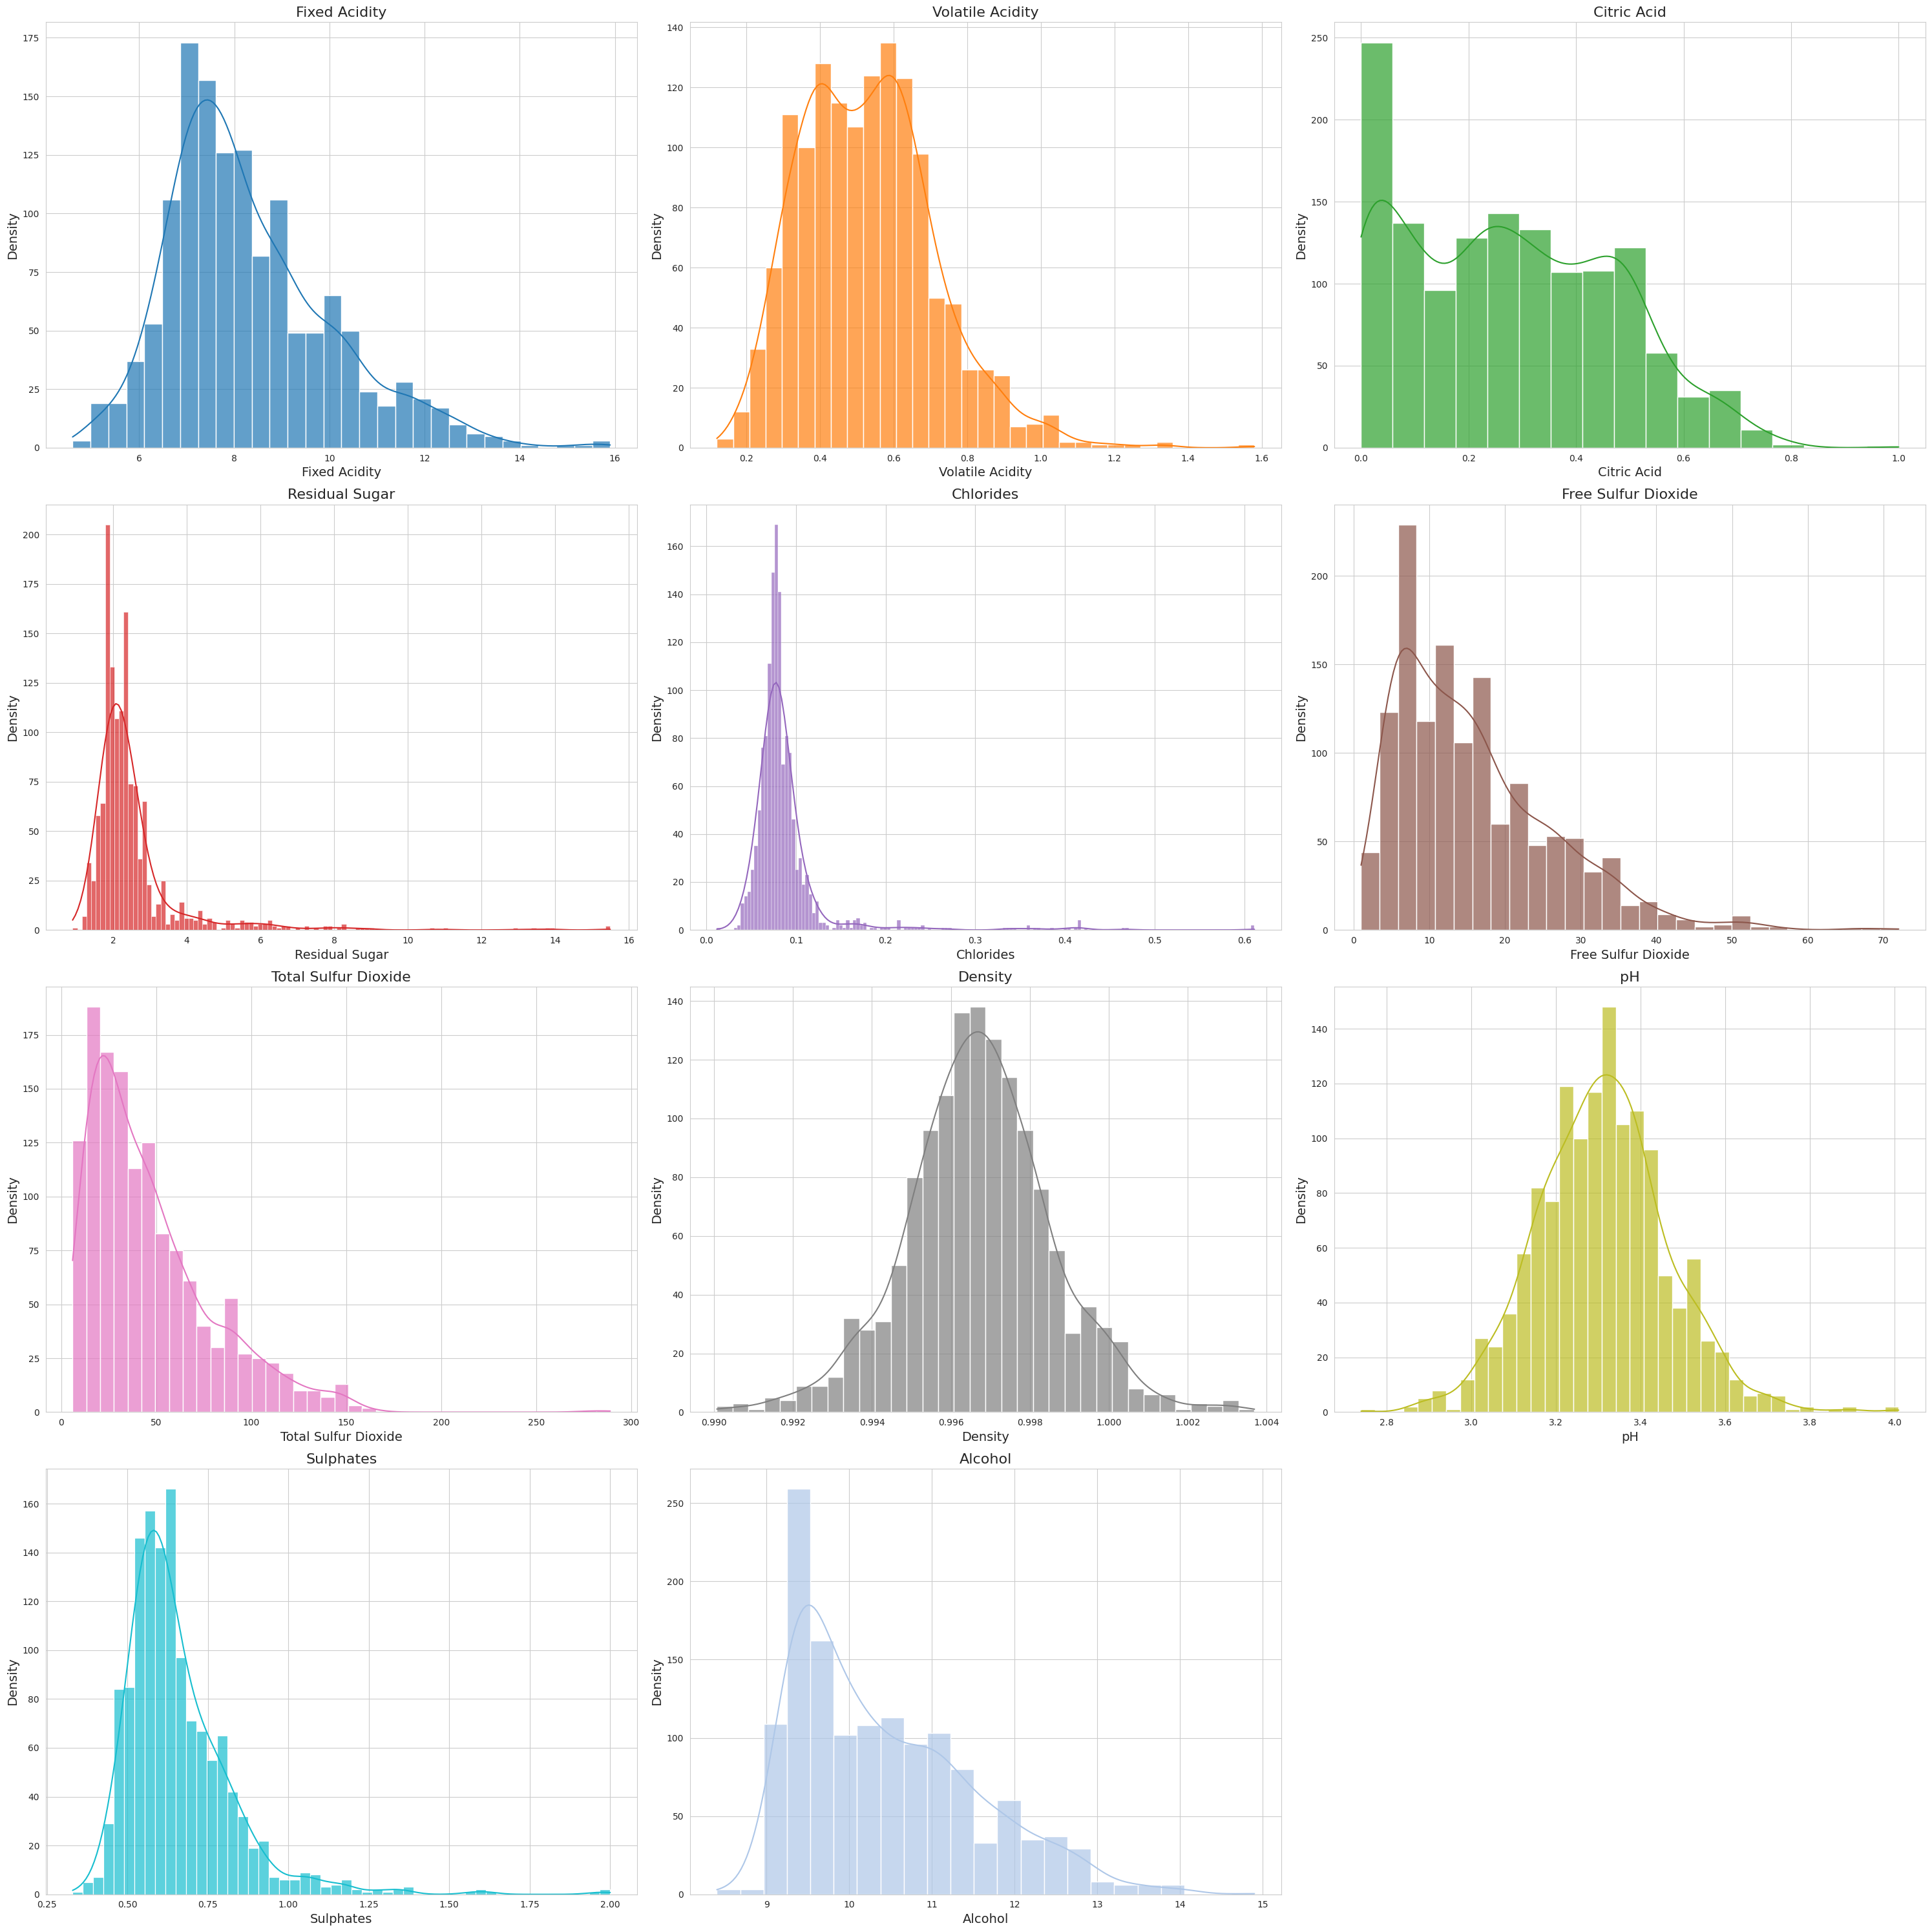

In [11]:
# Set style
sns.set_style("whitegrid")

# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

# Create a figure and define its size
plt.figure(figsize=(30, 30))

# Plot 1: Distribution plot for fixed acidity
plt.subplot(4, 3, 1)
sns.histplot(df['fixed acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Fixed Acidity', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Plot 2: Distribution plot for volatile acidity
plt.subplot(4, 3, 2)
sns.histplot(df['volatile acidity'], kde=True, color=colors[1], alpha=0.7)
plt.title('Volatile Acidity', fontsize=16)
plt.xlabel('Volatile Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Plot 3: Distribution plot for citric acid
plt.subplot(4, 3, 3)
sns.histplot(df['citric acid'], kde=True, color=colors[2], alpha=0.7)
plt.title('Citric Acid', fontsize=16)
plt.xlabel('Citric Acid', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Plot 4: Distribution plot for residual sugar
plt.subplot(4, 3, 4)
sns.histplot(df['residual sugar'], kde=True, color=colors[3], alpha=0.7)
plt.title('Residual Sugar', fontsize=16)
plt.xlabel('Residual Sugar', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Plot 5: Distribution plot for chlorides
plt.subplot(4, 3, 5)
sns.histplot(df['chlorides'], kde=True, color=colors[4], alpha=0.7)
plt.title('Chlorides', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Plot 6: Distribution plot for free sulfur dioxide
plt.subplot(4, 3, 6)
sns.histplot(df['free sulfur dioxide'], kde=True, color=colors[5], alpha=0.7)
plt.title('Free Sulfur Dioxide', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Plot 7: Distribution plot for total sulfur dioxide
plt.subplot(4, 3, 7)
sns.histplot(df['total sulfur dioxide'], kde=True, color=colors[6], alpha=0.7)
plt.title('Total Sulfur Dioxide', fontsize=16)
plt.xlabel('Total Sulfur Dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Plot 8: Distribution plot for density
plt.subplot(4, 3, 8)
sns.histplot(df['density'], kde=True, color=colors[7], alpha=0.7)
plt.title('Density', fontsize=16)
plt.xlabel('Density', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Plot 9: Distribution plot for pH
plt.subplot(4, 3, 9)
sns.histplot(df['pH'], kde=True, color=colors[8], alpha=0.7)
plt.title('pH', fontsize=16)
plt.xlabel('pH', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Plot 10: Distribution plot for sulphates
plt.subplot(4, 3, 10)
sns.histplot(df['sulphates'], kde=True, color=colors[9], alpha=0.7)
plt.title('Sulphates', fontsize=16)
plt.xlabel('Sulphates', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Plot 11: Distribution plot for alcohol
plt.subplot(4, 3, 11)
sns.histplot(df['alcohol'], kde=True, color=colors[10], alpha=0.7)
plt.title('Alcohol', fontsize=16)
plt.xlabel('Alcohol', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

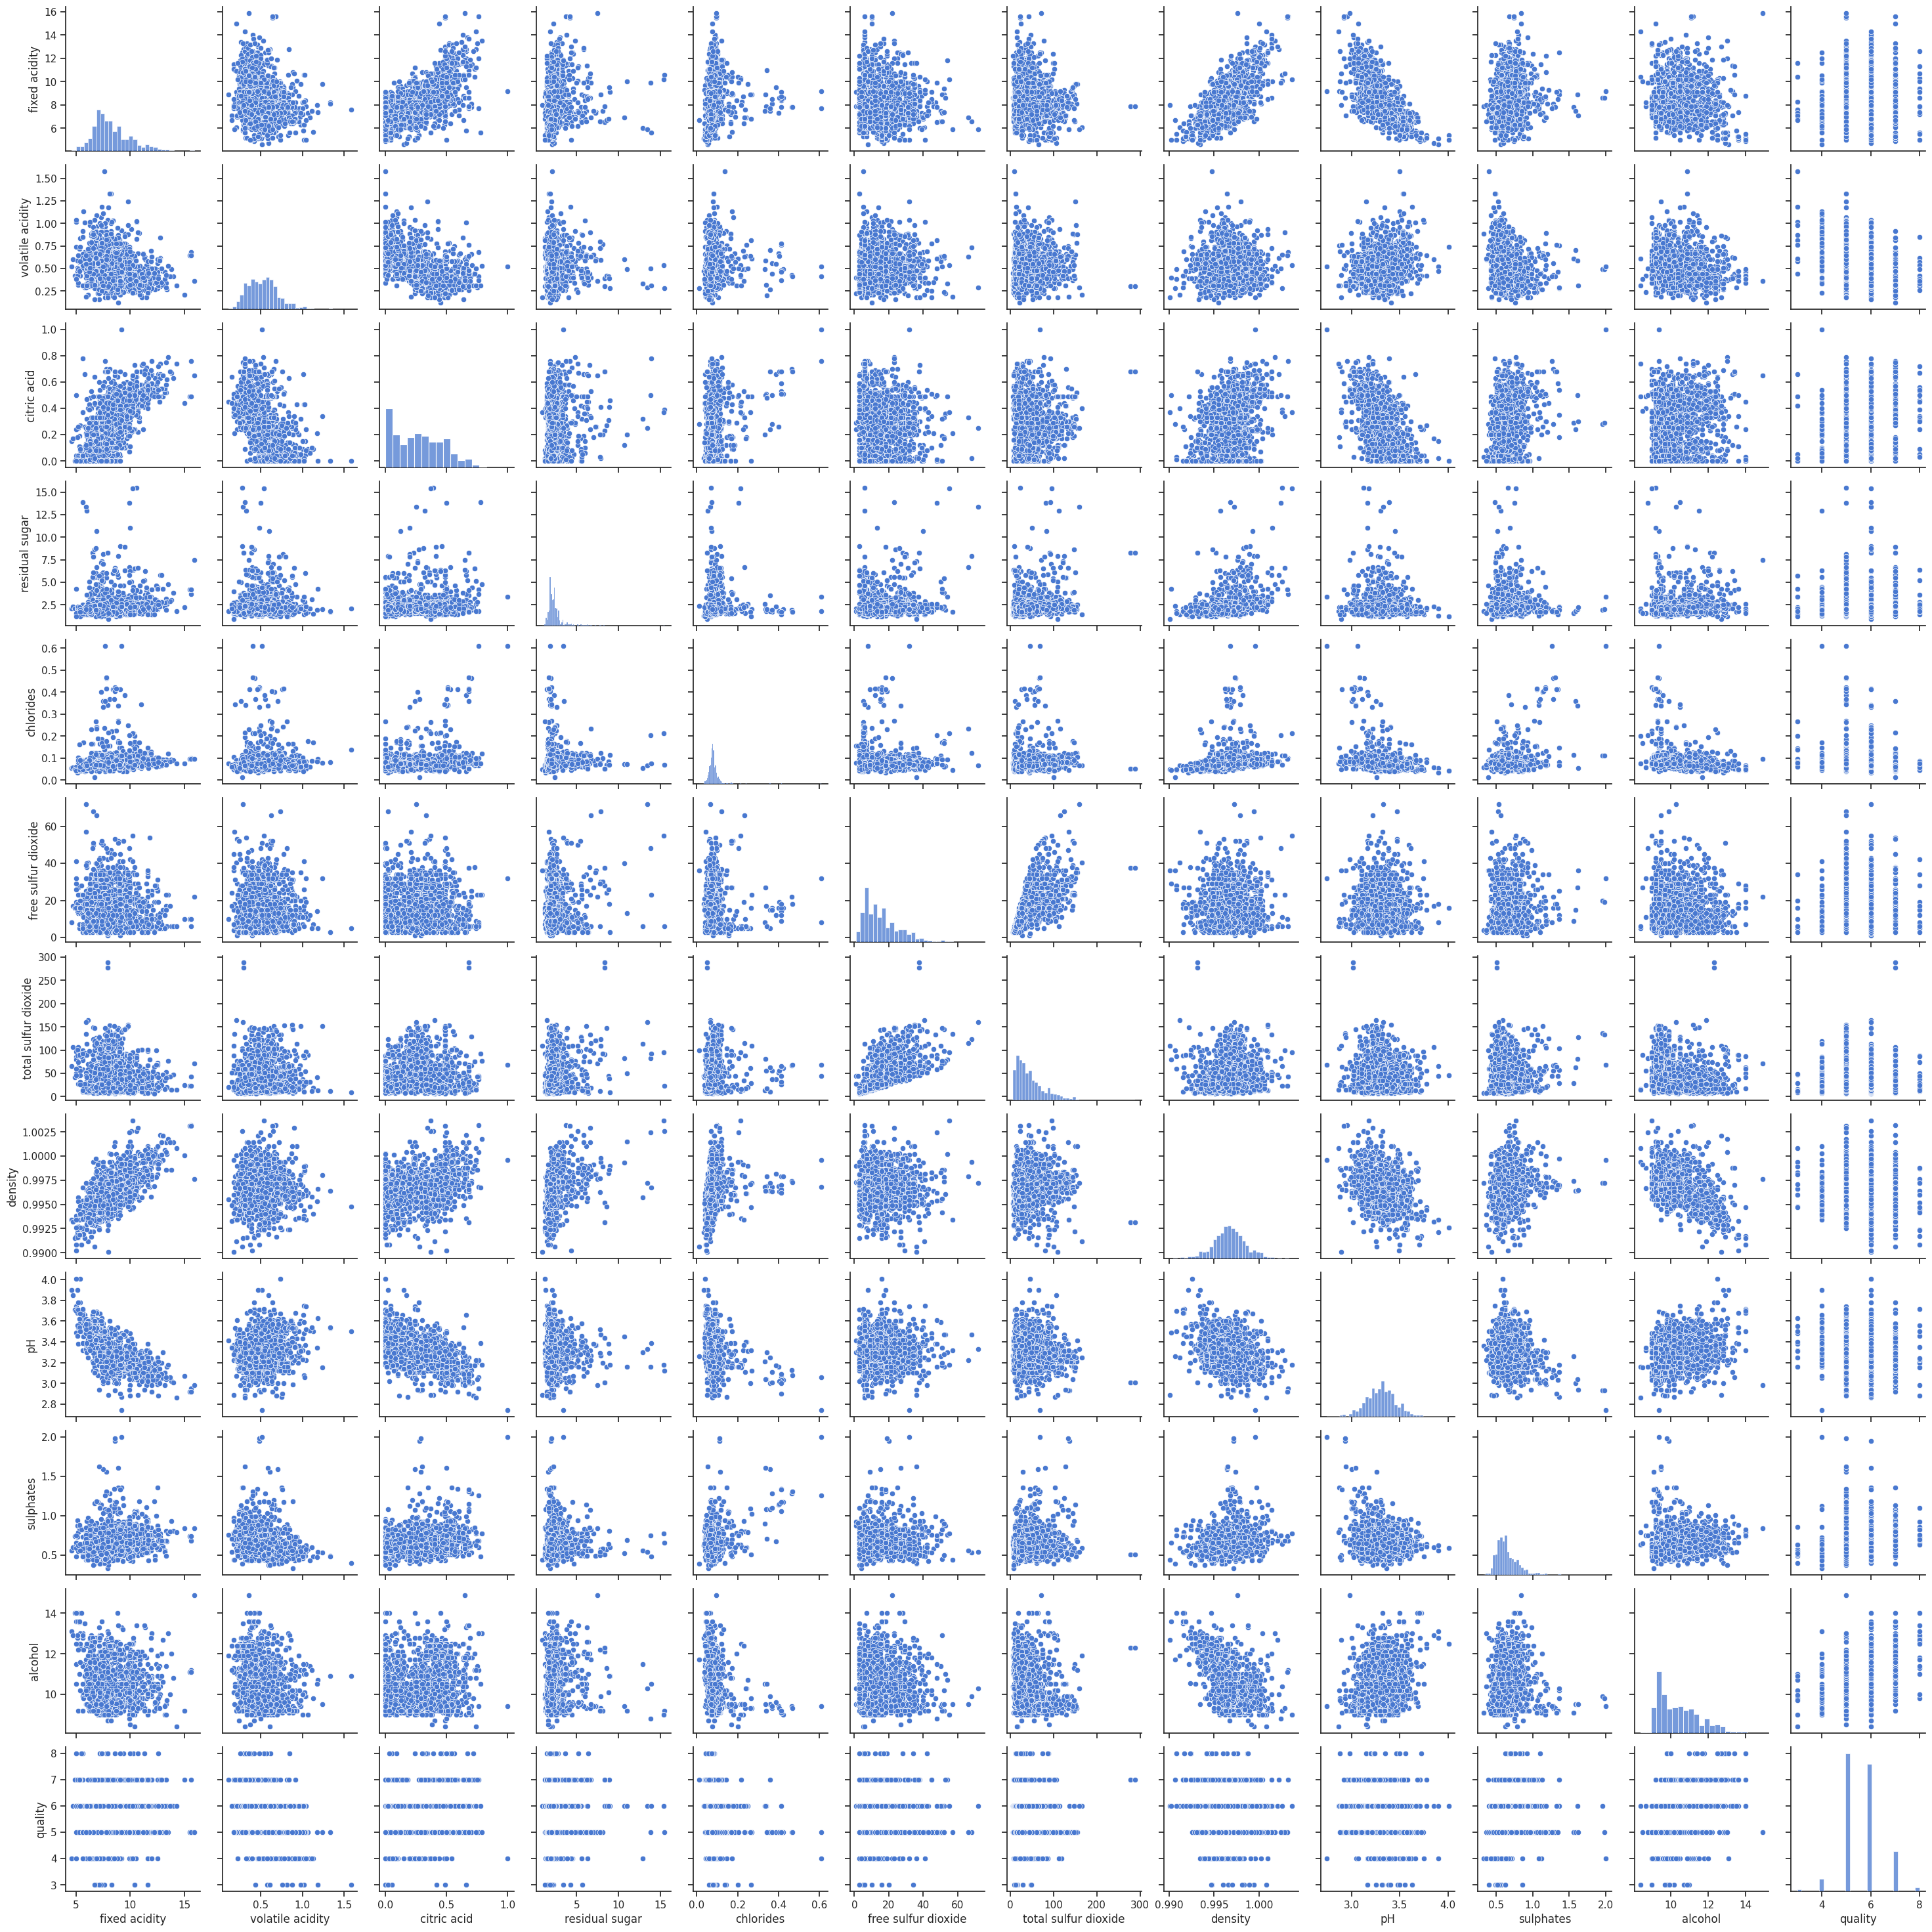

In [12]:
sns.set(style="ticks", palette="muted")
sns.pairplot(df)

**Visualize the distribution of the quality column**

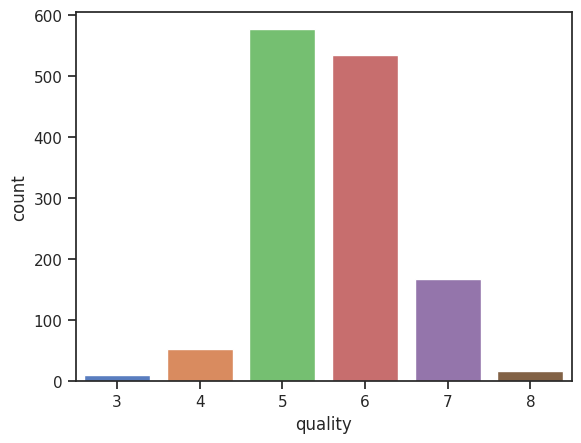

In [13]:
sns.countplot(x='quality', data=df)
plt.show()

**Check for correlations**

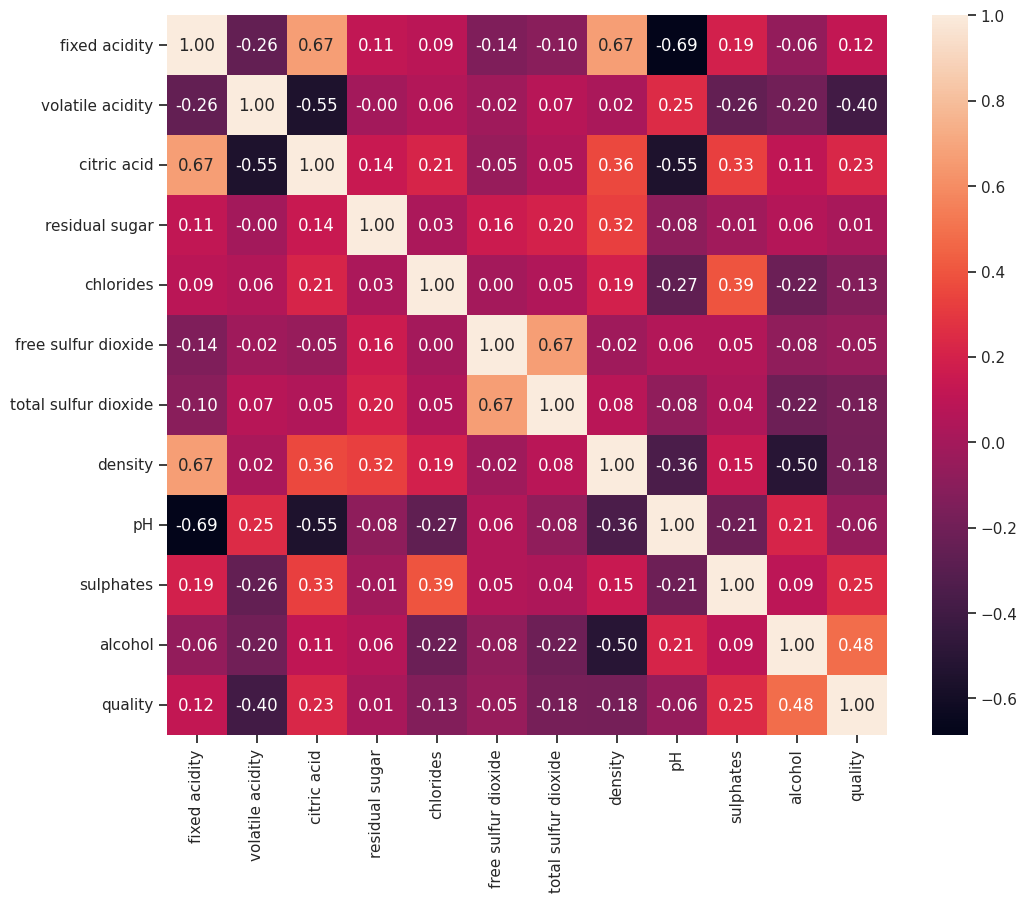

In [14]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

# Adjust layout
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.2, wspace=0.2)

# Show plot
plt.show()


**Detect and remove outliers**

In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: xlabel='fixed acidity'>

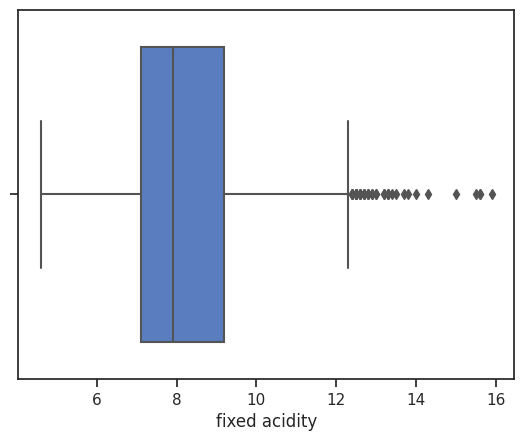

In [16]:
sns.boxplot(data=df, x='fixed acidity')

In [17]:
df['fixed acidity'].describe()

count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [18]:
def find_outliers_using_three_sigma_rule(df, feature):
	max_boundary = df[feature].mean() + (3 * df[feature].std())
	min_boundary = df[feature].mean() - (3 * df[feature].std())
	# print(f'Highest Value: {max_boundary} \n Lowest Value: {min_boundary}')
	return df[(df[feature] > max_boundary) | (df[feature] < min_boundary)].shape

In [19]:
def remove_outliers_using_three_sigma_rule(df, feature):
	max_boundary = df[feature].mean() + (3 * df[feature].std())
	min_boundary = df[feature].mean() - (3 * df[feature].std())
	new_df = df[(df[feature] < max_boundary) & (df[feature] > min_boundary)]
	return new_df
	

In [20]:
find_outliers_using_three_sigma_rule(df, 'fixed acidity')

(9, 12)

In [21]:
new_df = remove_outliers_using_three_sigma_rule(df, 'fixed acidity')

In [22]:
new_df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
612            7.5              0.64         0.00             2.4      0.077   
640            9.9              0.54         0.45             2.3      0.071   
341           10.6              0.42         0.48             2.7      0.065   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
612                 18.0                  29.0   0.9965  3.32       0.60   
640                 16.0                  40.0   0.9991  3.39       0.62   
341                  5.0                  18.0   0.9972  3.21       0.87   

     alcohol  quality  
612     10.0        6  
640      9.4        5  
341     11.3        6

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


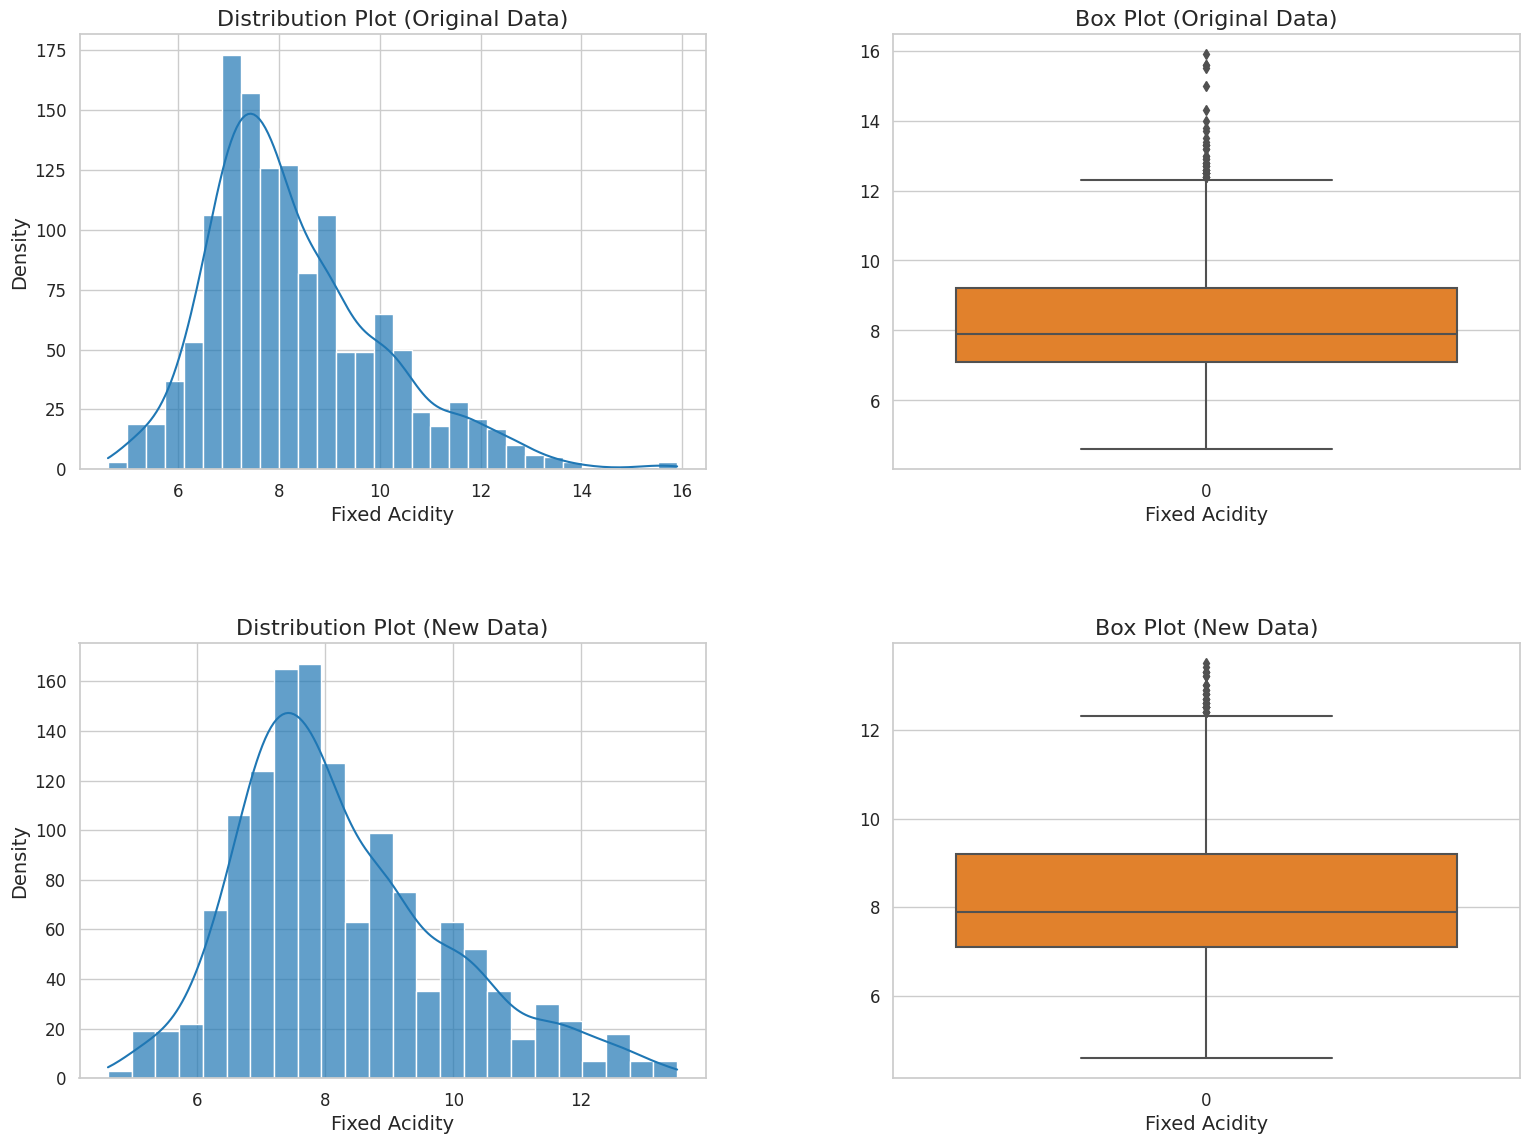

In [23]:
# Set style
sns.set_style("whitegrid")

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Create a figure and define its size
plt.figure(figsize=(16, 12))

# Plot 1: Distribution plot for original data
plt.subplot(2, 2, 1)
sns.histplot(df['fixed acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot 2: Box plot for original data
plt.subplot(2, 2, 2)
sns.boxplot(df['fixed acidity'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot 3: Distribution plot for new data
plt.subplot(2, 2, 3)
sns.histplot(new_df['fixed acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot 4: Box plot for new data
plt.subplot(2, 2, 4)
sns.boxplot(new_df['fixed acidity'], color=colors[1])
plt.title('Box Plot (New Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Manually adjust layout
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

# Show the plots
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fixed acidity', ylabel='Density'>

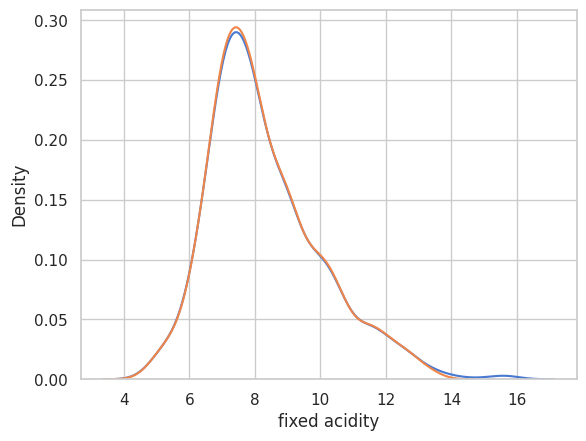

In [24]:
sns.kdeplot(df['fixed acidity'], label='Original Data')
sns.kdeplot(new_df['fixed acidity'], label='New Data')

**Not much impact on distribution that is why I remove all outliers from fixed acidity feature**

In [25]:
df['fixed acidity'].describe(), new_df['fixed acidity'].describe()

(count    1359.000000
 mean        8.310596
 std         1.736990
 min         4.600000
 25%         7.100000
 50%         7.900000
 75%         9.200000
 max        15.900000
 Name: fixed acidity, dtype: float64,
 count    1350.000000
 mean        8.267185
 std         1.657697
 min         4.600000
 25%         7.100000
 50%         7.900000
 75%         9.200000
 max        13.500000
 Name: fixed acidity, dtype: float64)

In [26]:
df = new_df

In [27]:
df.shape

(1350, 12)

<Axes: xlabel='volatile acidity'>

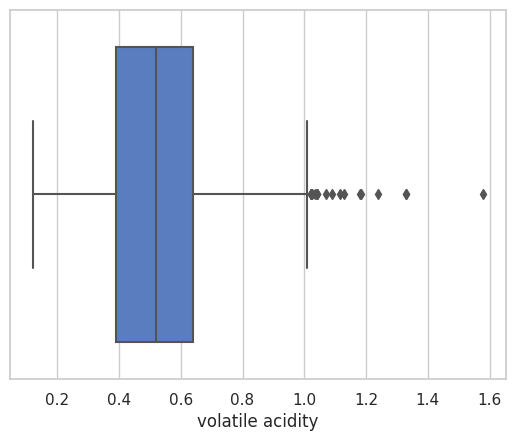

In [28]:
sns.boxplot(data=df, x='volatile acidity')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


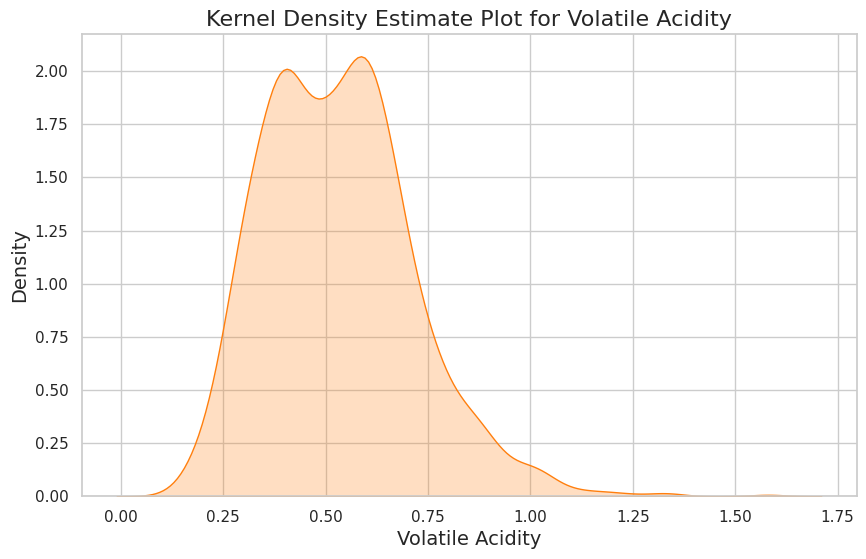

In [29]:
# Set style
sns.set_style("whitegrid")

# Define colors
color = '#ff7f0e'  # New color

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot KDE plot for volatile acidity with the new color
sns.kdeplot(df['volatile acidity'], color=color, fill=True)

# Add title and labels
plt.title('Kernel Density Estimate Plot for Volatile Acidity', fontsize=16)
plt.xlabel('Volatile Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show plot
plt.show()


In [30]:
def find_outliers_using_interquartile_range(df, feature):
	percentile_25 = df[feature].quantile(0.25)
	percentile_75 = df[feature].quantile(0.75)
	# print(percentile_25, percentile_75)
	iqr = percentile_75 - percentile_25
	# print(iqr)
	lower_limit = percentile_25 - 1.5 * iqr
	upper_limit = percentile_75 + 1.5 * iqr
	# print(lower_limit, upper_limit)
	return df[(df[feature] > upper_limit) | (df[feature] < lower_limit)].shape

In [31]:
def remove_outliers_using_interquartile_range(df, feature):
	percentile_25 = df[feature].quantile(0.25)
	percentile_75 = df[feature].quantile(0.75)
	iqr = percentile_75 - percentile_25
	lower_limit = percentile_25 - 1.5 * iqr
	upper_limit = percentile_75 + 1.5 * iqr
	return df[(df[feature] < upper_limit) & (df[feature] > lower_limit)]

In [32]:
new_df_using_iqr = remove_outliers_using_interquartile_range(df, 'volatile acidity')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


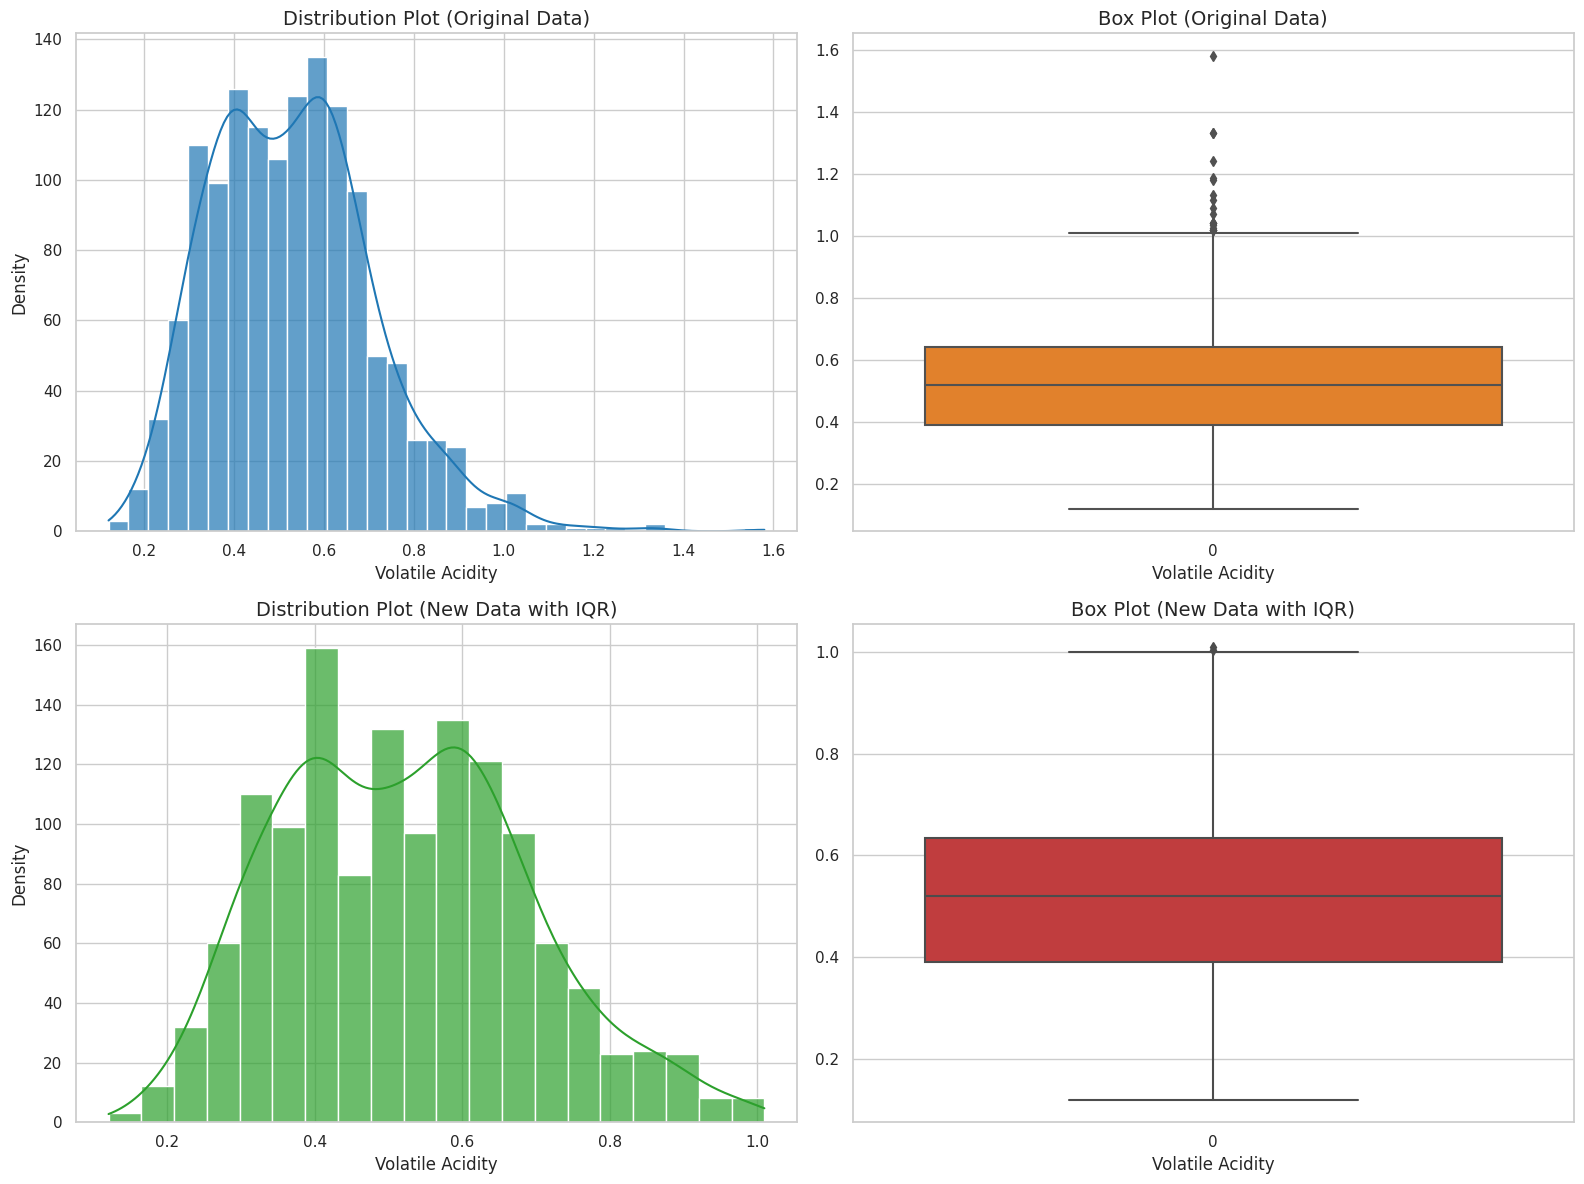

In [33]:
# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a figure and define its size
plt.figure(figsize=(16, 12))

# Plot 1: Distribution plot for original data
plt.subplot(2, 2, 1)
sns.histplot(df['volatile acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Plot 2: Box plot for original data
plt.subplot(2, 2, 2)
sns.boxplot(df['volatile acidity'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)

# Plot 3: Distribution plot for new data with IQR
plt.subplot(2, 2, 3)
sns.histplot(new_df_using_iqr['volatile acidity'], kde=True, color=colors[2], alpha=0.7)
plt.title('Distribution Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Plot 4: Box plot for new data with IQR
plt.subplot(2, 2, 4)
sns.boxplot(new_df_using_iqr['volatile acidity'], color=colors[3])
plt.title('Box Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


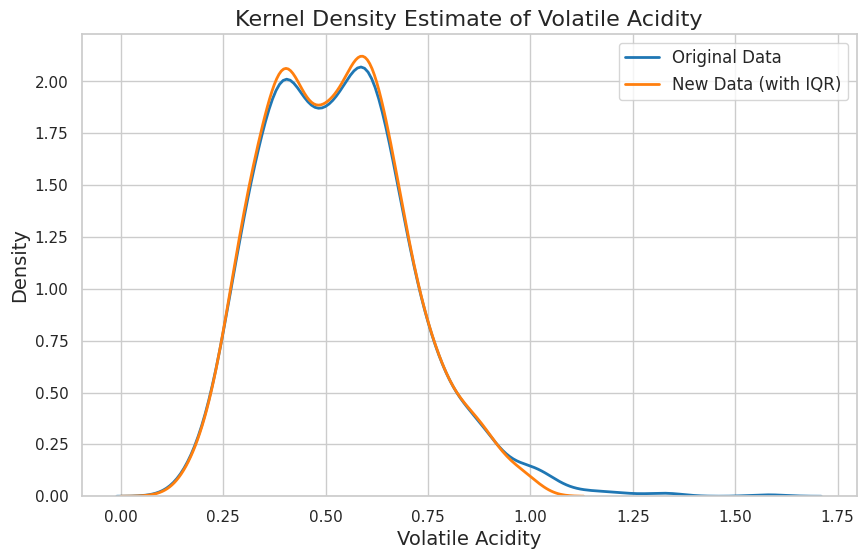

In [34]:
# Set style
sns.set_style("whitegrid")

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot KDE for original data
sns.kdeplot(df['volatile acidity'], color=colors[0], label='Original Data', linewidth=2)

# Plot KDE for new data with IQR
sns.kdeplot(new_df_using_iqr['volatile acidity'], color=colors[1], label='New Data (with IQR)', linewidth=2)

# Add titles and labels
plt.title('Kernel Density Estimate of Volatile Acidity', fontsize=16)
plt.xlabel('Volatile Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.show()


In [35]:
df = new_df_using_iqr

In [36]:
df.shape

(1331, 12)

In [37]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


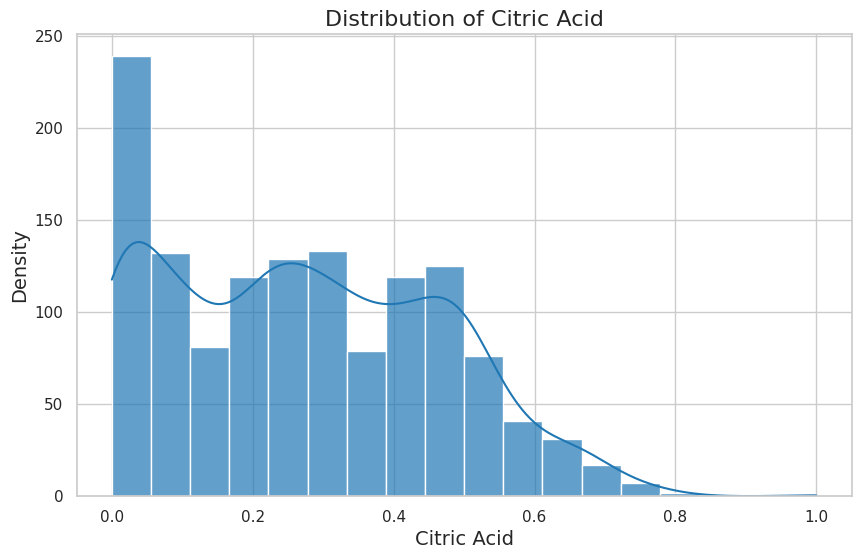

In [38]:
# Set style
sns.set_style("whitegrid")

# Define colors
color = '#1f77b4'

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for citric acid
sns.histplot(df['citric acid'], kde=True, color=color, alpha=0.7)

# Add title and labels
plt.title('Distribution of Citric Acid', fontsize=16)
plt.xlabel('Citric Acid', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show plot
plt.show()


<Axes: xlabel='citric acid'>

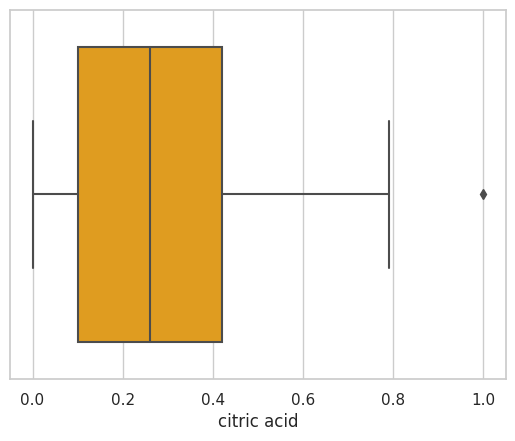

In [39]:
sns.boxplot(data=df, x='citric acid', color='orange')

**citric acid feature is not normal distributed so that is why we remove outliers using IQR technique**

In [40]:
df['citric acid'].describe()

count    1331.000000
mean        0.272141
std         0.193810
min         0.000000
25%         0.100000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [41]:
df['citric acid'].skew()

0.29930809519912543

In [42]:
find_outliers_using_interquartile_range(df, 'citric acid')

(1, 12)

In [43]:
new_df_using_iqr = remove_outliers_using_interquartile_range(df, 'citric acid')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


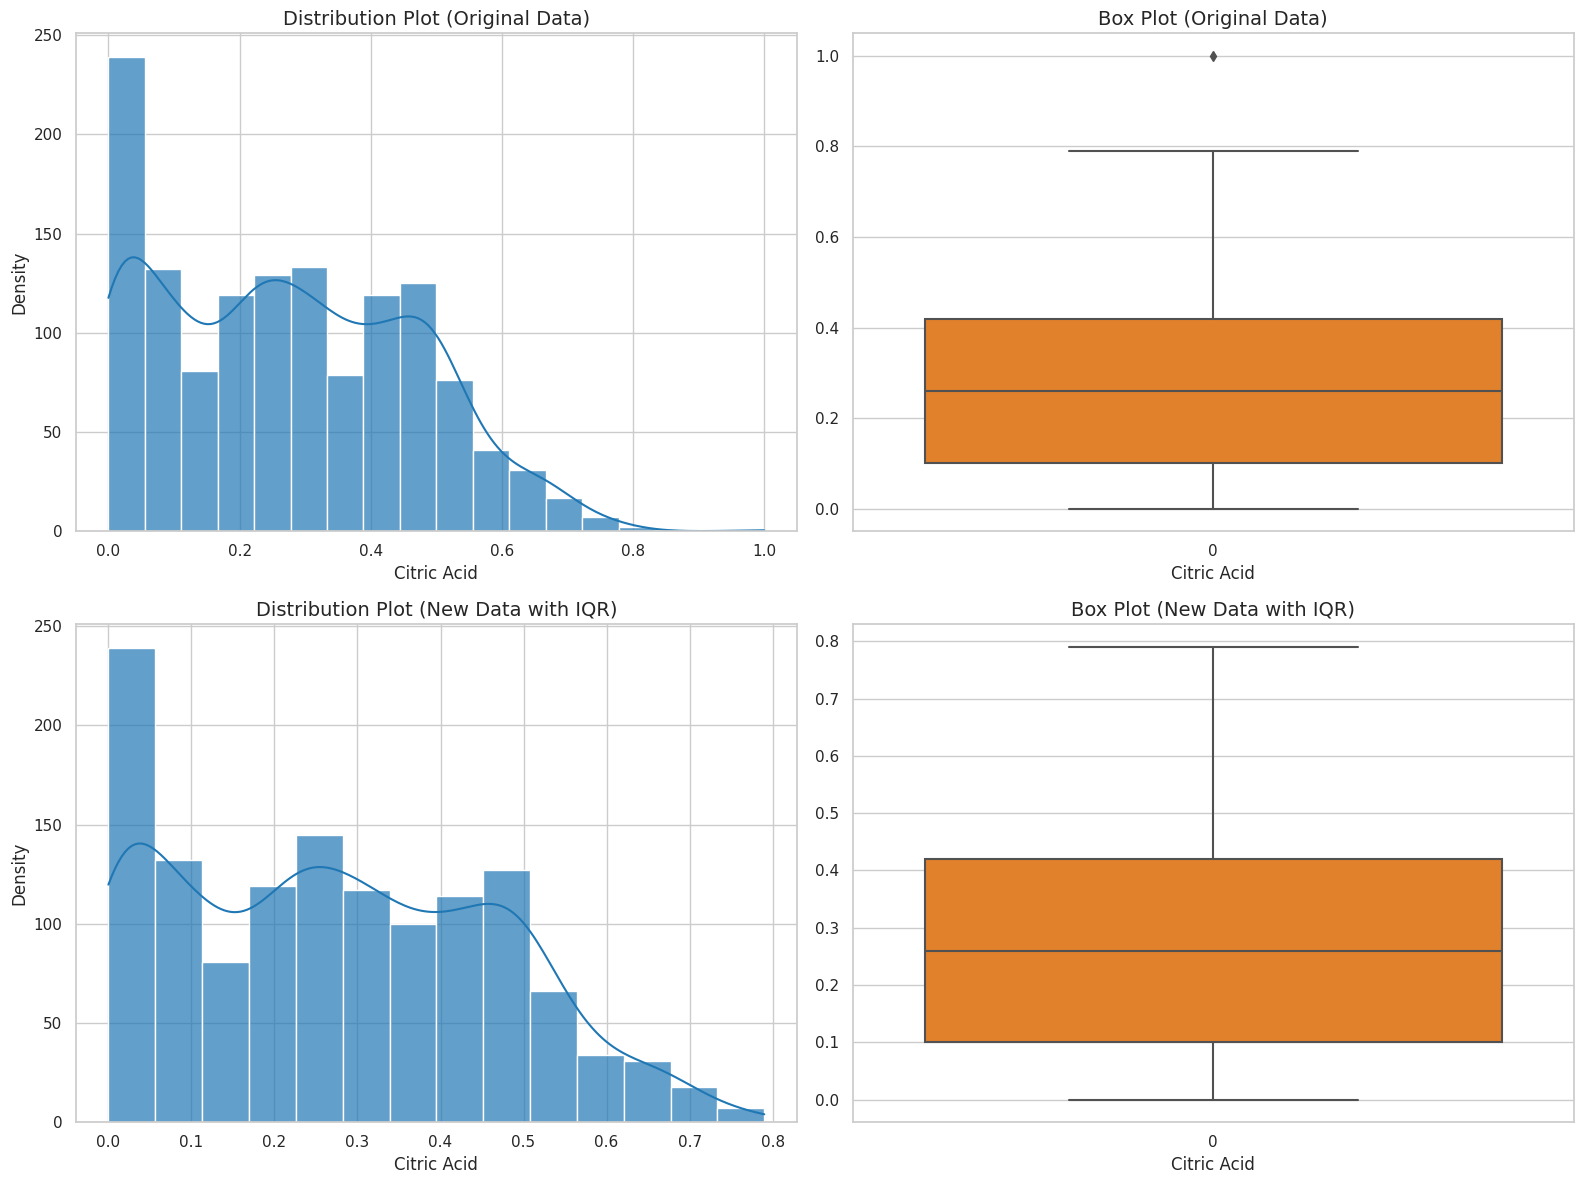

In [44]:
# Set style
sns.set_style("whitegrid")

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Create a figure and define its size
plt.figure(figsize=(16, 12))

# Plot 1: Distribution plot for original data
plt.subplot(2, 2, 1)
sns.histplot(df['citric acid'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Plot 2: Box plot for original data
plt.subplot(2, 2, 2)
sns.boxplot(df['citric acid'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)

# Plot 3: Distribution plot for new data with IQR
plt.subplot(2, 2, 3)
sns.histplot(new_df_using_iqr['citric acid'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Plot 4: Box plot for new data with IQR
plt.subplot(2, 2, 4)
sns.boxplot(new_df_using_iqr['citric acid'], color=colors[1])
plt.title('Box Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [45]:
df = new_df_using_iqr

In [46]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


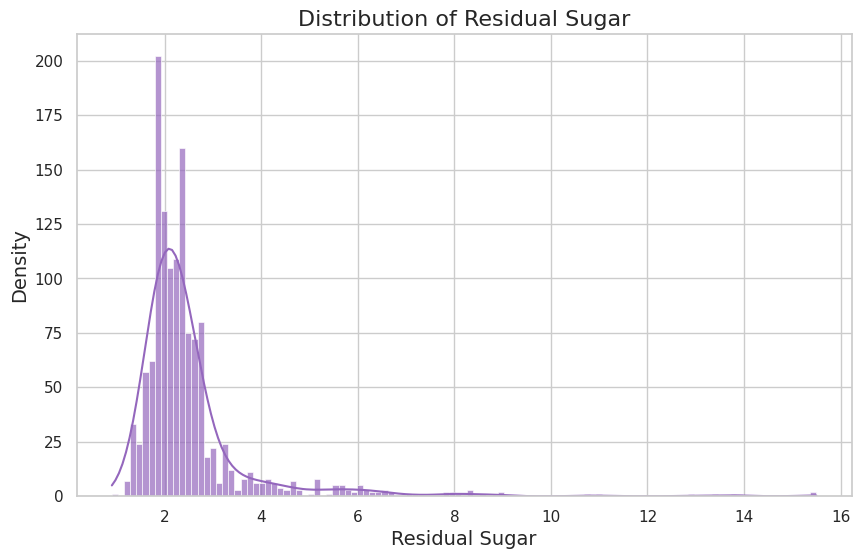

In [47]:
# Set style
sns.set_style("whitegrid")

# Define color
color = '#9467bd'  # unique color

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for residual sugar
sns.histplot(df['residual sugar'], kde=True, color=color, alpha=0.7)

# Add title and labels
plt.title('Distribution of Residual Sugar', fontsize=16)
plt.xlabel('Residual Sugar', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show plot
plt.show()


<Axes: >

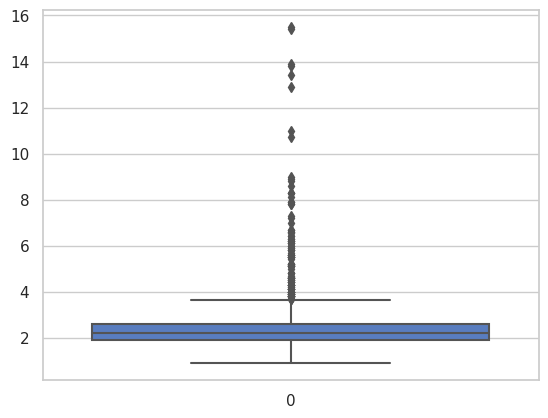

In [48]:
sns.boxplot(df['residual sugar'])

In [49]:
def remove_outliers_using_caping(df, feature):
	# Assuming 'df' is your DataFrame and 'residual_sugar' is the column name
	# Calculate Q1 (25th percentile) and Q3 (75th percentile)
	Q1 = df[feature].quantile(0.25)
	Q3 = df[feature].quantile(0.75)

	# Calculate IQR
	IQR = Q3 - Q1

	# Calculate the lower and upper bounds
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR

	print(upper_bound, lower_bound)


	df[feature+' new'] = np.where(df[feature] > upper_bound, upper_bound,
                                np.where(df[feature] < lower_bound, lower_bound, df[feature]))
	return df

In [50]:
def remove_outliers_using_imputation(df, feature):
	median_residual_sugar = df[feature].mean()
	Q1 = df[feature].quantile(0.25)
	Q3 = df[feature].quantile(0.75)
	# Calculate IQR
	IQR = Q3 - Q1
	df[feature+' new'] = np.where((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)),
                                median_residual_sugar, df[feature])
	return df

In [51]:
df = remove_outliers_using_imputation(df, 'residual sugar')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


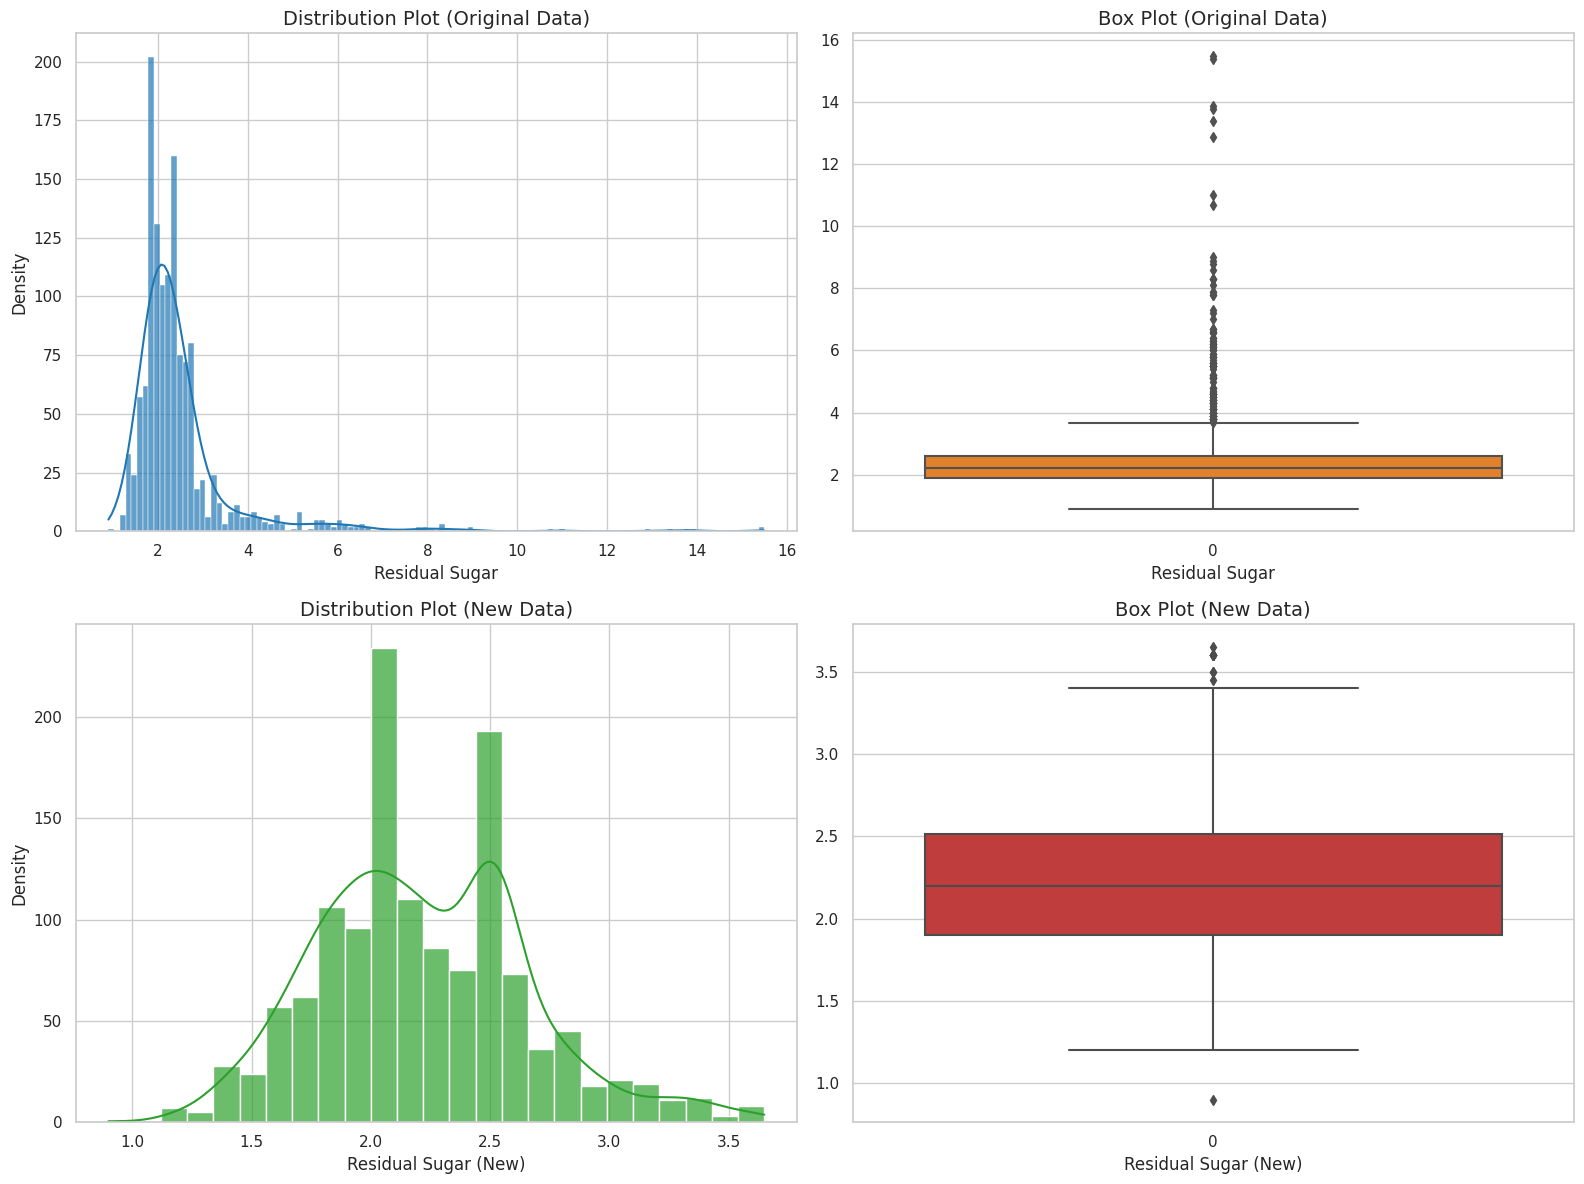

In [52]:
# Set style
sns.set_style("whitegrid")

# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a figure and define its size
plt.figure(figsize=(16, 12))

# Plot 1: Distribution plot for original data
plt.subplot(2, 2, 1)
sns.histplot(df['residual sugar'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=14)
plt.xlabel('Residual Sugar', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Plot 2: Box plot for original data
plt.subplot(2, 2, 2)
sns.boxplot(df['residual sugar'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=14)
plt.xlabel('Residual Sugar', fontsize=12)

# Plot 3: Distribution plot for new data
plt.subplot(2, 2, 3)
sns.histplot(df['residual sugar new'], kde=True, color=colors[2], alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=14)
plt.xlabel('Residual Sugar (New)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Plot 4: Box plot for new data
plt.subplot(2, 2, 4)
sns.boxplot(df['residual sugar new'], color=colors[3])
plt.title('Box Plot (New Data)', fontsize=14)
plt.xlabel('Residual Sugar (New)', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [53]:
df['residual sugar'].describe(), df['residual sugar new'].describe()

(count    1330.000000
 mean        2.515677
 std         1.350897
 min         0.900000
 25%         1.900000
 50%         2.200000
 75%         2.600000
 max        15.500000
 Name: residual sugar, dtype: float64,
 count    1330.000000
 mean        2.216628
 std         0.442816
 min         0.900000
 25%         1.900000
 50%         2.200000
 75%         2.515677
 max         3.650000
 Name: residual sugar new, dtype: float64)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


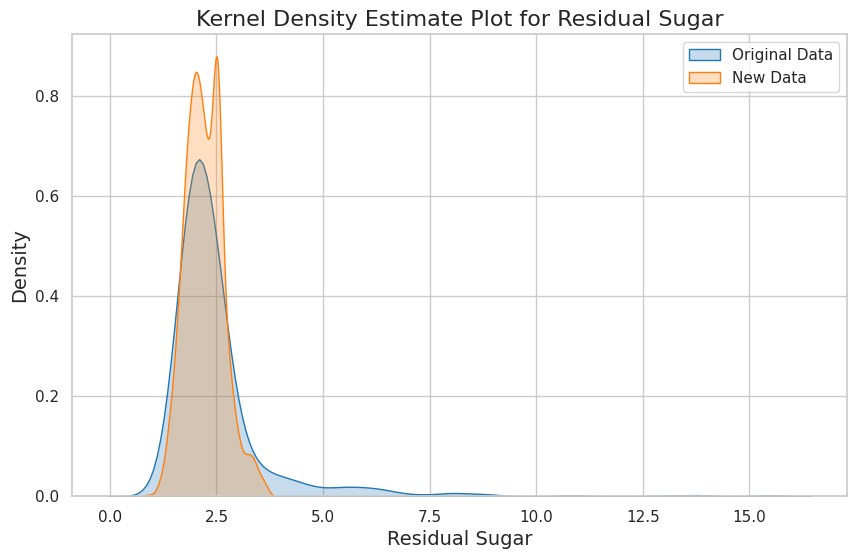

In [54]:
# Set style
sns.set_style("whitegrid")

# Define colors
color1 = '#1f77b4'  # Color for original data
color2 = '#ff7f0e'  # Color for new data

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot KDE plots for both original and new data
sns.kdeplot(df['residual sugar'], color=color1, fill=True, label='Original Data')
sns.kdeplot(df['residual sugar new'], color=color2, fill=True, label='New Data')

# Add title and labels
plt.title('Kernel Density Estimate Plot for Residual Sugar', fontsize=16)
plt.xlabel('Residual Sugar', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend()

# Show plot
plt.show()


In [55]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1367            6.9             0.540         0.30             2.2      0.088   
1553            7.3             0.735         0.00             2.2      0.080   
241            12.0             0.380         0.56             2.1      0.093   
1307            6.8             0.680         0.09             3.9      0.068   
370             6.9             0.765         0.02             2.3      0.063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1367                  9.0                 105.0  0.99725  3.25       1.18   
1553                 18.0                  28.0  0.99765  3.41       0.60   
241                   6.0                  24.0  0.99925  3.14       0.71   
1307                 15.0                  29.0  0.99524  3.41       0.52   
370                  35.0                  63.0  0.99750  3.57       0.78   

      alcohol  quality  residual sugar new  
1367     10.5        6            2.200000  
1553      9.4        5            2.200000  
241      10.9        6            2.100000  
1307     11.1        4            2.515677  
370       9.9        5            2.300000

In [56]:
df['residual sugar'] = df['residual sugar new']

In [57]:
df.drop(['residual sugar new'], axis=1, inplace=True)

In [58]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1373            7.7             0.750         0.27        2.515677      0.110   
892            10.1             0.450         0.23        1.900000      0.082   
761             9.3             0.655         0.26        2.000000      0.096   
953            10.2             0.340         0.48        2.100000      0.052   
1584            6.7             0.320         0.44        2.400000      0.061   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1373                 34.0                  89.0  0.99664  3.24       0.45   
892                  10.0                  18.0  0.99774  3.22       0.65   
761                   5.0                  35.0  0.99738  3.25       0.42   
953                   5.0                   9.0  0.99458  3.20       0.69   
1584                 24.0                  34.0  0.99484  3.29       0.80   

      alcohol  quality  
1373      9.3        5  
892       9.3        6  
761       9.6        5  
953      12.1        7  
1584     11.6        7

In [59]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


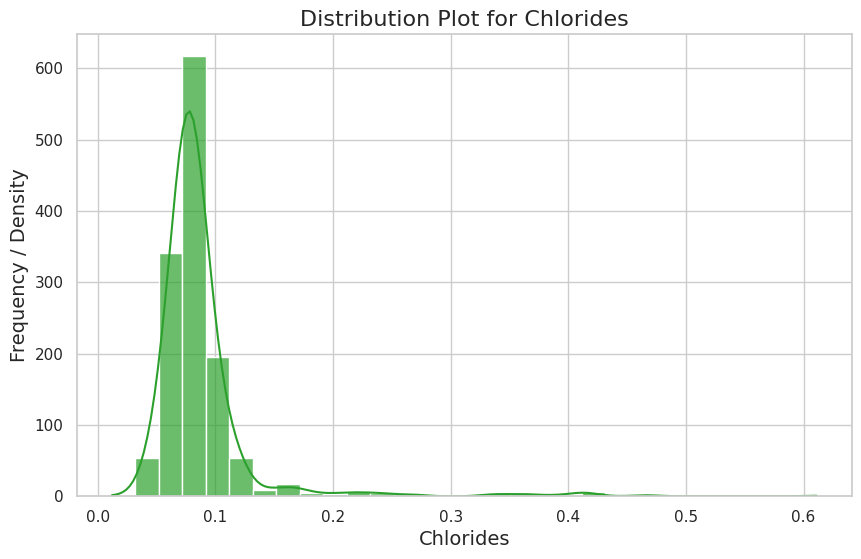

In [60]:
# Define color
color = '#2ca02c'  # Unique color

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for chlorides
sns.histplot(df['chlorides'], kde=True, color=color, bins=30, alpha=0.7)

# Add title and labels
plt.title('Distribution Plot for Chlorides', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

# Show plot
plt.show()


<Axes: xlabel='chlorides'>

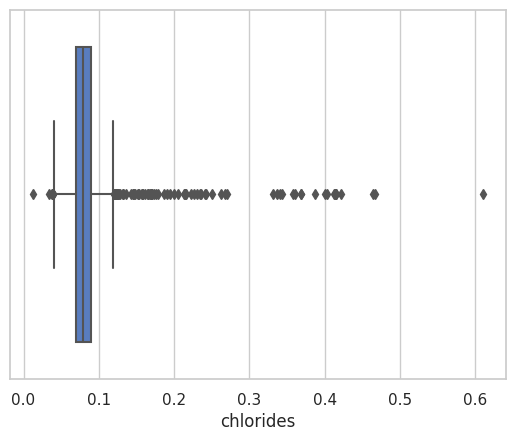

In [61]:
sns.boxplot(data=df, x='chlorides')

In [62]:
find_outliers_using_interquartile_range(df, 'chlorides')

(97, 12)

In [63]:
df = remove_outliers_using_imputation(df, 'chlorides')

In [64]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
125             9.0              0.62         0.04        1.900000      0.146   
1217            8.2              0.34         0.37        1.900000      0.057   
833            11.6              0.47         0.44        1.600000      0.147   
663            10.1              0.28         0.46        1.800000      0.050   
1043            9.5              0.39         0.41        2.515677      0.069   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
125                  27.0                  90.0  0.99840  3.16       0.70   
1217                 43.0                  74.0  0.99408  3.23       0.81   
833                  36.0                  51.0  0.99836  3.38       0.86   
663                   5.0                  13.0  0.99740  3.04       0.79   
1043                 18.0                  39.0  0.99859  3.29       0.81   

      alcohol  quality  chlorides new  
125       9.4        5       0.087706  
1217     12.0        6       0.057000  
833       9.9        4       0.087706  
663      10.2        6       0.050000  
1043     10.9        7       0.069000

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


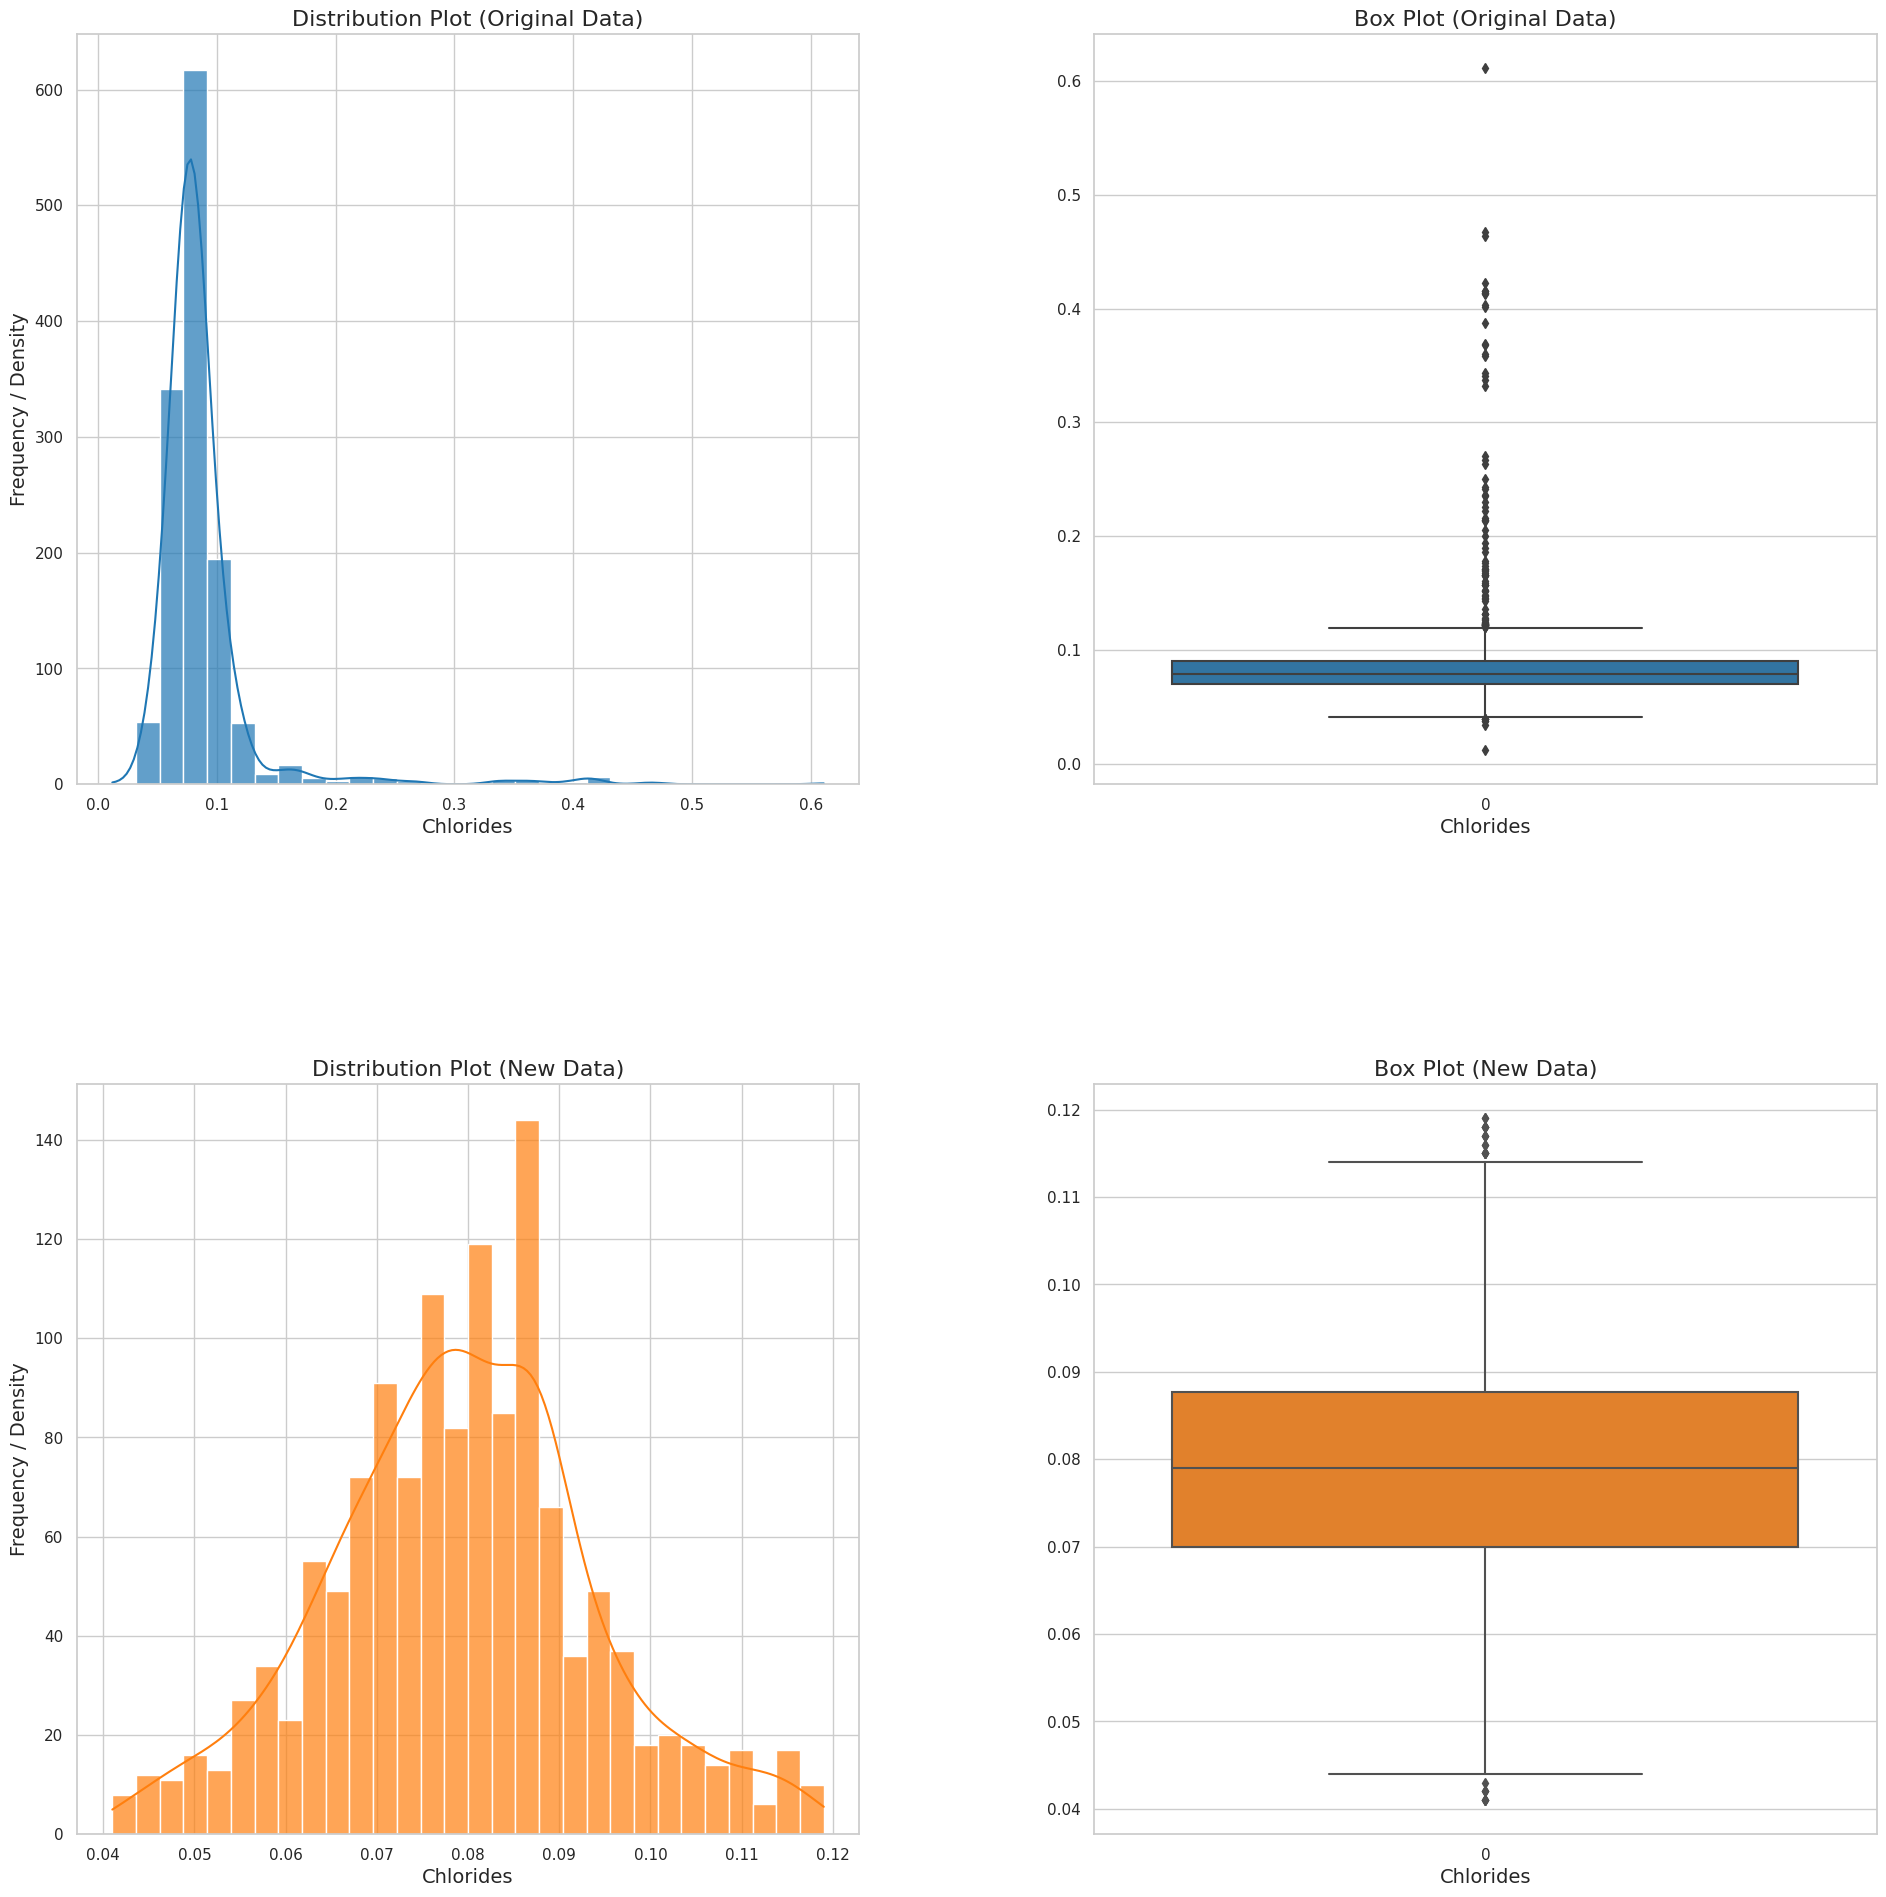

In [65]:
# Define colors
color1 = '#1f77b4'  # Color for original data
color2 = '#ff7f0e'  # Color for new data

# Create a figure and define its size
plt.figure(figsize=(20, 20))

# Plot 1: Distribution plot for original data (chlorides)
plt.subplot(2, 2, 1)
sns.histplot(df['chlorides'], kde=True, color=color1, bins=30, alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

# Plot 2: Box plot for original data (chlorides)
plt.subplot(2, 2, 2)
sns.boxplot(df['chlorides'], color=color1)
plt.title('Box Plot (Original Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)

# Plot 3: Distribution plot for new data (chlorides new)
plt.subplot(2, 2, 3)
sns.histplot(df['chlorides new'], kde=True, color=color2, bins=30, alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

# Plot 4: Box plot for new data (chlorides new)
plt.subplot(2, 2, 4)
sns.boxplot(df['chlorides new'], color=color2)
plt.title('Box Plot (New Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)

# Manually adjust layout
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

# Show the plots
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


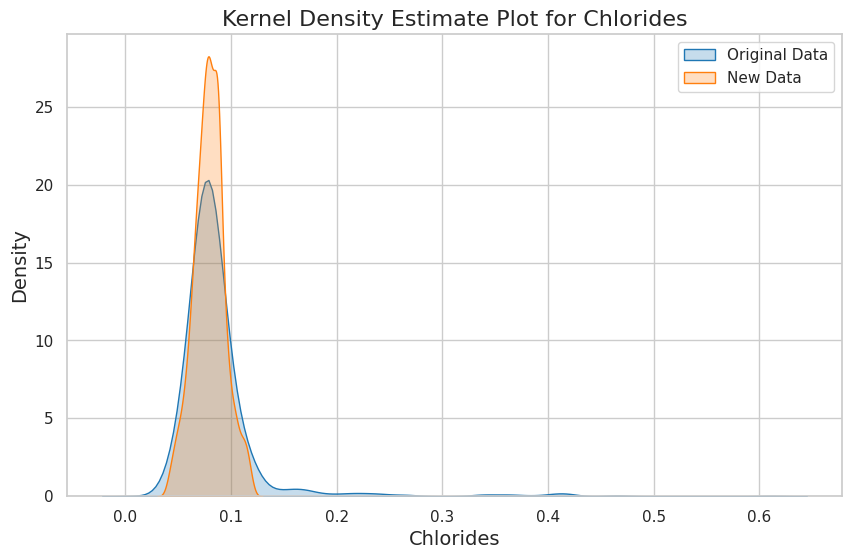

In [66]:
# Define colors
color1 = '#1f77b4'  # Color for original data
color2 = '#ff7f0e'  # Color for new data

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot KDE plots for both original and new data
sns.kdeplot(df['chlorides'], color=color1, fill=True, label='Original Data')
sns.kdeplot(df['chlorides new'], color=color2, fill=True, label='New Data')

# Add title and labels
plt.title('Kernel Density Estimate Plot for Chlorides', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend()

# Show plot
plt.show()


/tmp/ipykernel_18/724851494.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chlorides'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/724851494.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a gu

<Axes: >

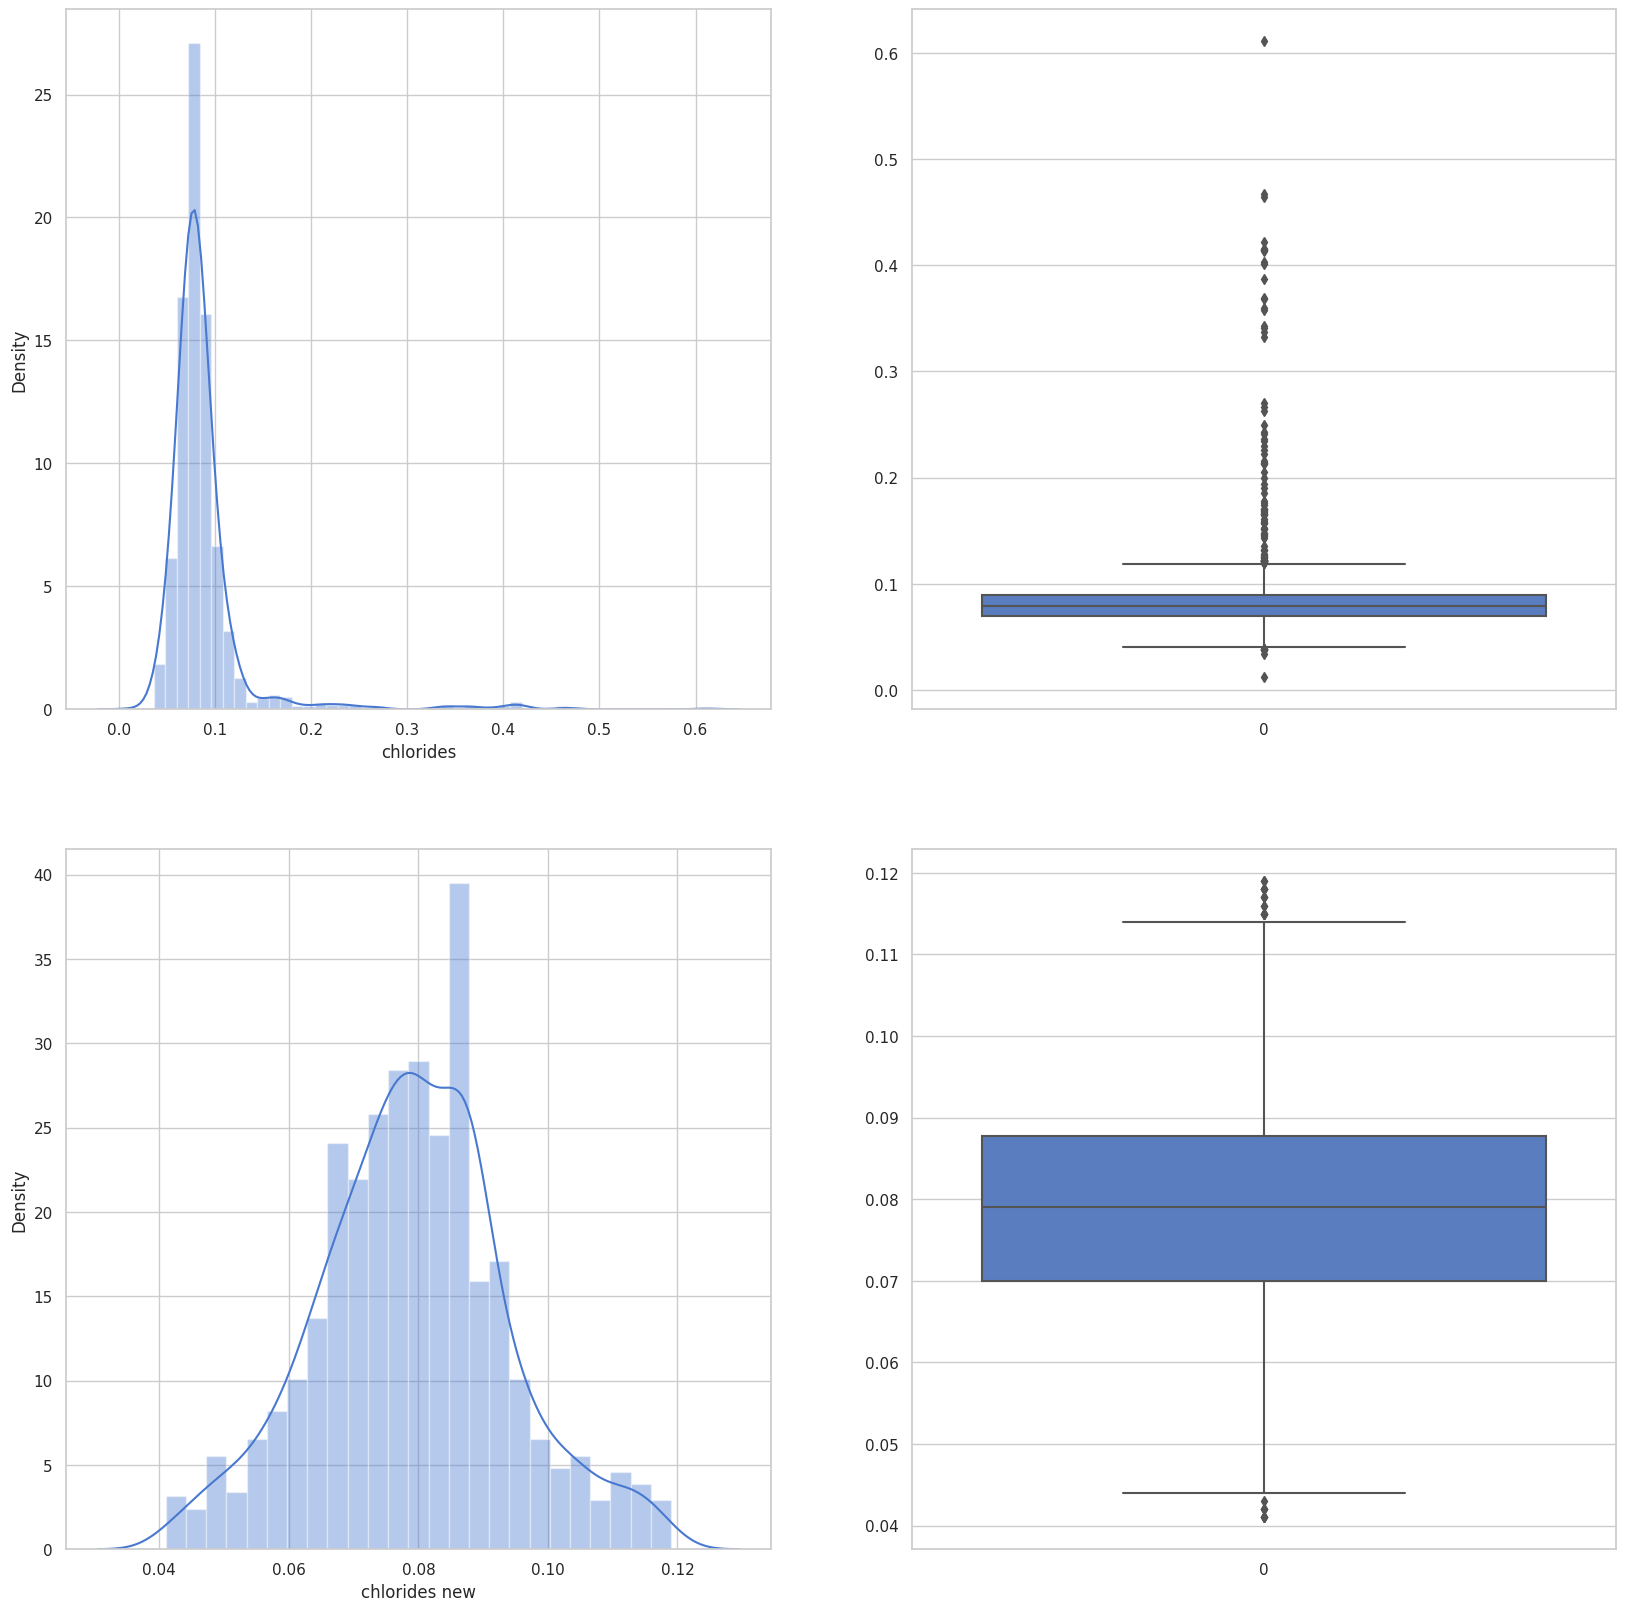

In [67]:
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
sns.distplot(df['chlorides'])

plt.subplot(2, 2, 2)
sns.boxplot(df['chlorides'])

plt.subplot(2, 2, 3)
sns.distplot(df['chlorides new'])

plt.subplot(2, 2, 4)
sns.boxplot(df['chlorides new'])

In [68]:
df['chlorides'].describe(), df['chlorides new'].describe()

(count    1330.000000
 mean        0.087706
 std         0.047629
 min         0.012000
 25%         0.070000
 50%         0.079000
 75%         0.090000
 max         0.611000
 Name: chlorides, dtype: float64,
 count    1330.000000
 mean        0.079190
 std         0.014677
 min         0.041000
 25%         0.070000
 50%         0.079000
 75%         0.087706
 max         0.119000
 Name: chlorides new, dtype: float64)

In [69]:
df['chlorides'] = df['chlorides new']

In [70]:
df.drop('chlorides new', axis=1, inplace=True)

In [71]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1121            6.6              0.50         0.00        1.800000      0.062   
894             7.2              0.63         0.03        2.200000      0.080   
1388            6.6              0.64         0.31        2.515677      0.083   
1590            6.3              0.55         0.15        1.800000      0.077   
90              7.9              0.52         0.26        1.900000      0.079   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1121                 21.0                  28.0  0.99352  3.44       0.55   
894                  17.0                  88.0  0.99745  3.53       0.58   
1388                  7.0                  49.0  0.99718  3.35       0.68   
1590                 26.0                  35.0  0.99314  3.32       0.82   
90                   42.0                 140.0  0.99640  3.23       0.54   

      alcohol  quality  
1121     12.3        6  
894       9.8        6  
1388     10.3        5  
1590     11.6        6  
90        9.5        5

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


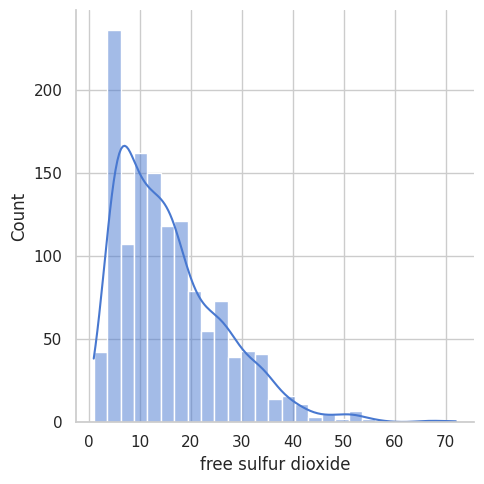

In [72]:
sns.displot(df['free sulfur dioxide'], kde=True)

<Axes: xlabel='free sulfur dioxide'>

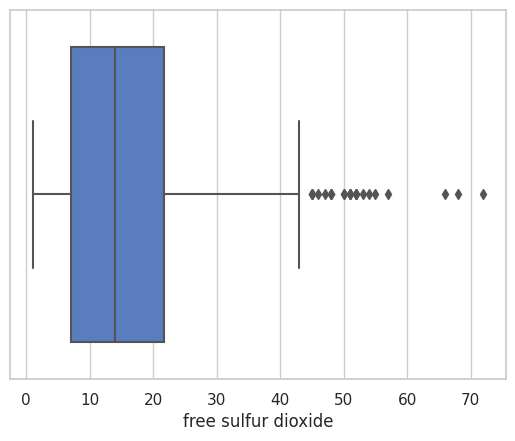

In [73]:
sns.boxplot(data=df, x='free sulfur dioxide')

In [74]:
find_outliers_using_interquartile_range(df, 'free sulfur dioxide')

(23, 12)

In [75]:
df = remove_outliers_using_caping(df, 'free sulfur dioxide')

43.875 -15.125


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


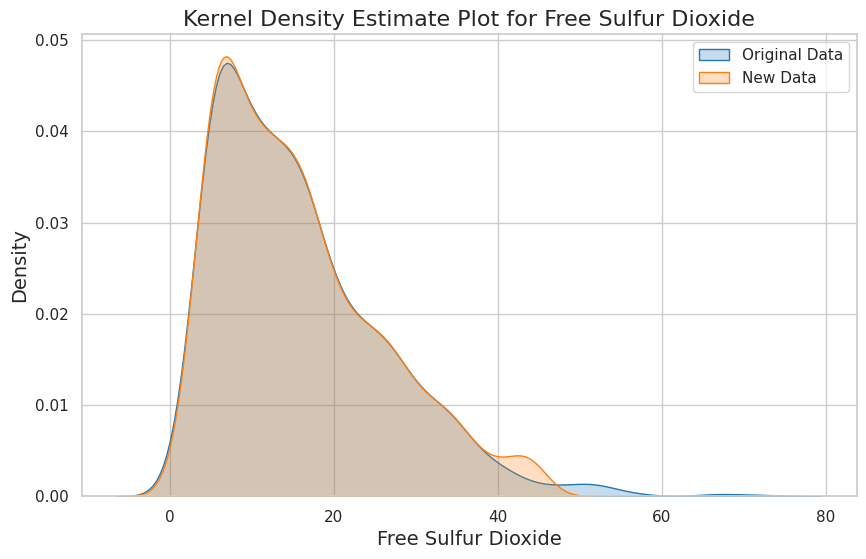

In [76]:
# Define colors
color1 = '#1f77b4'  # Color for original data
color2 = '#ff7f0e'  # Color for new data

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot KDE plots for both original and new data
sns.kdeplot(df['free sulfur dioxide'], color=color1, fill=True, label='Original Data')
sns.kdeplot(df['free sulfur dioxide new'], color=color2, fill=True, label='New Data')

# Add title and labels
plt.title('Kernel Density Estimate Plot for Free Sulfur Dioxide', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend()

# Show plot
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


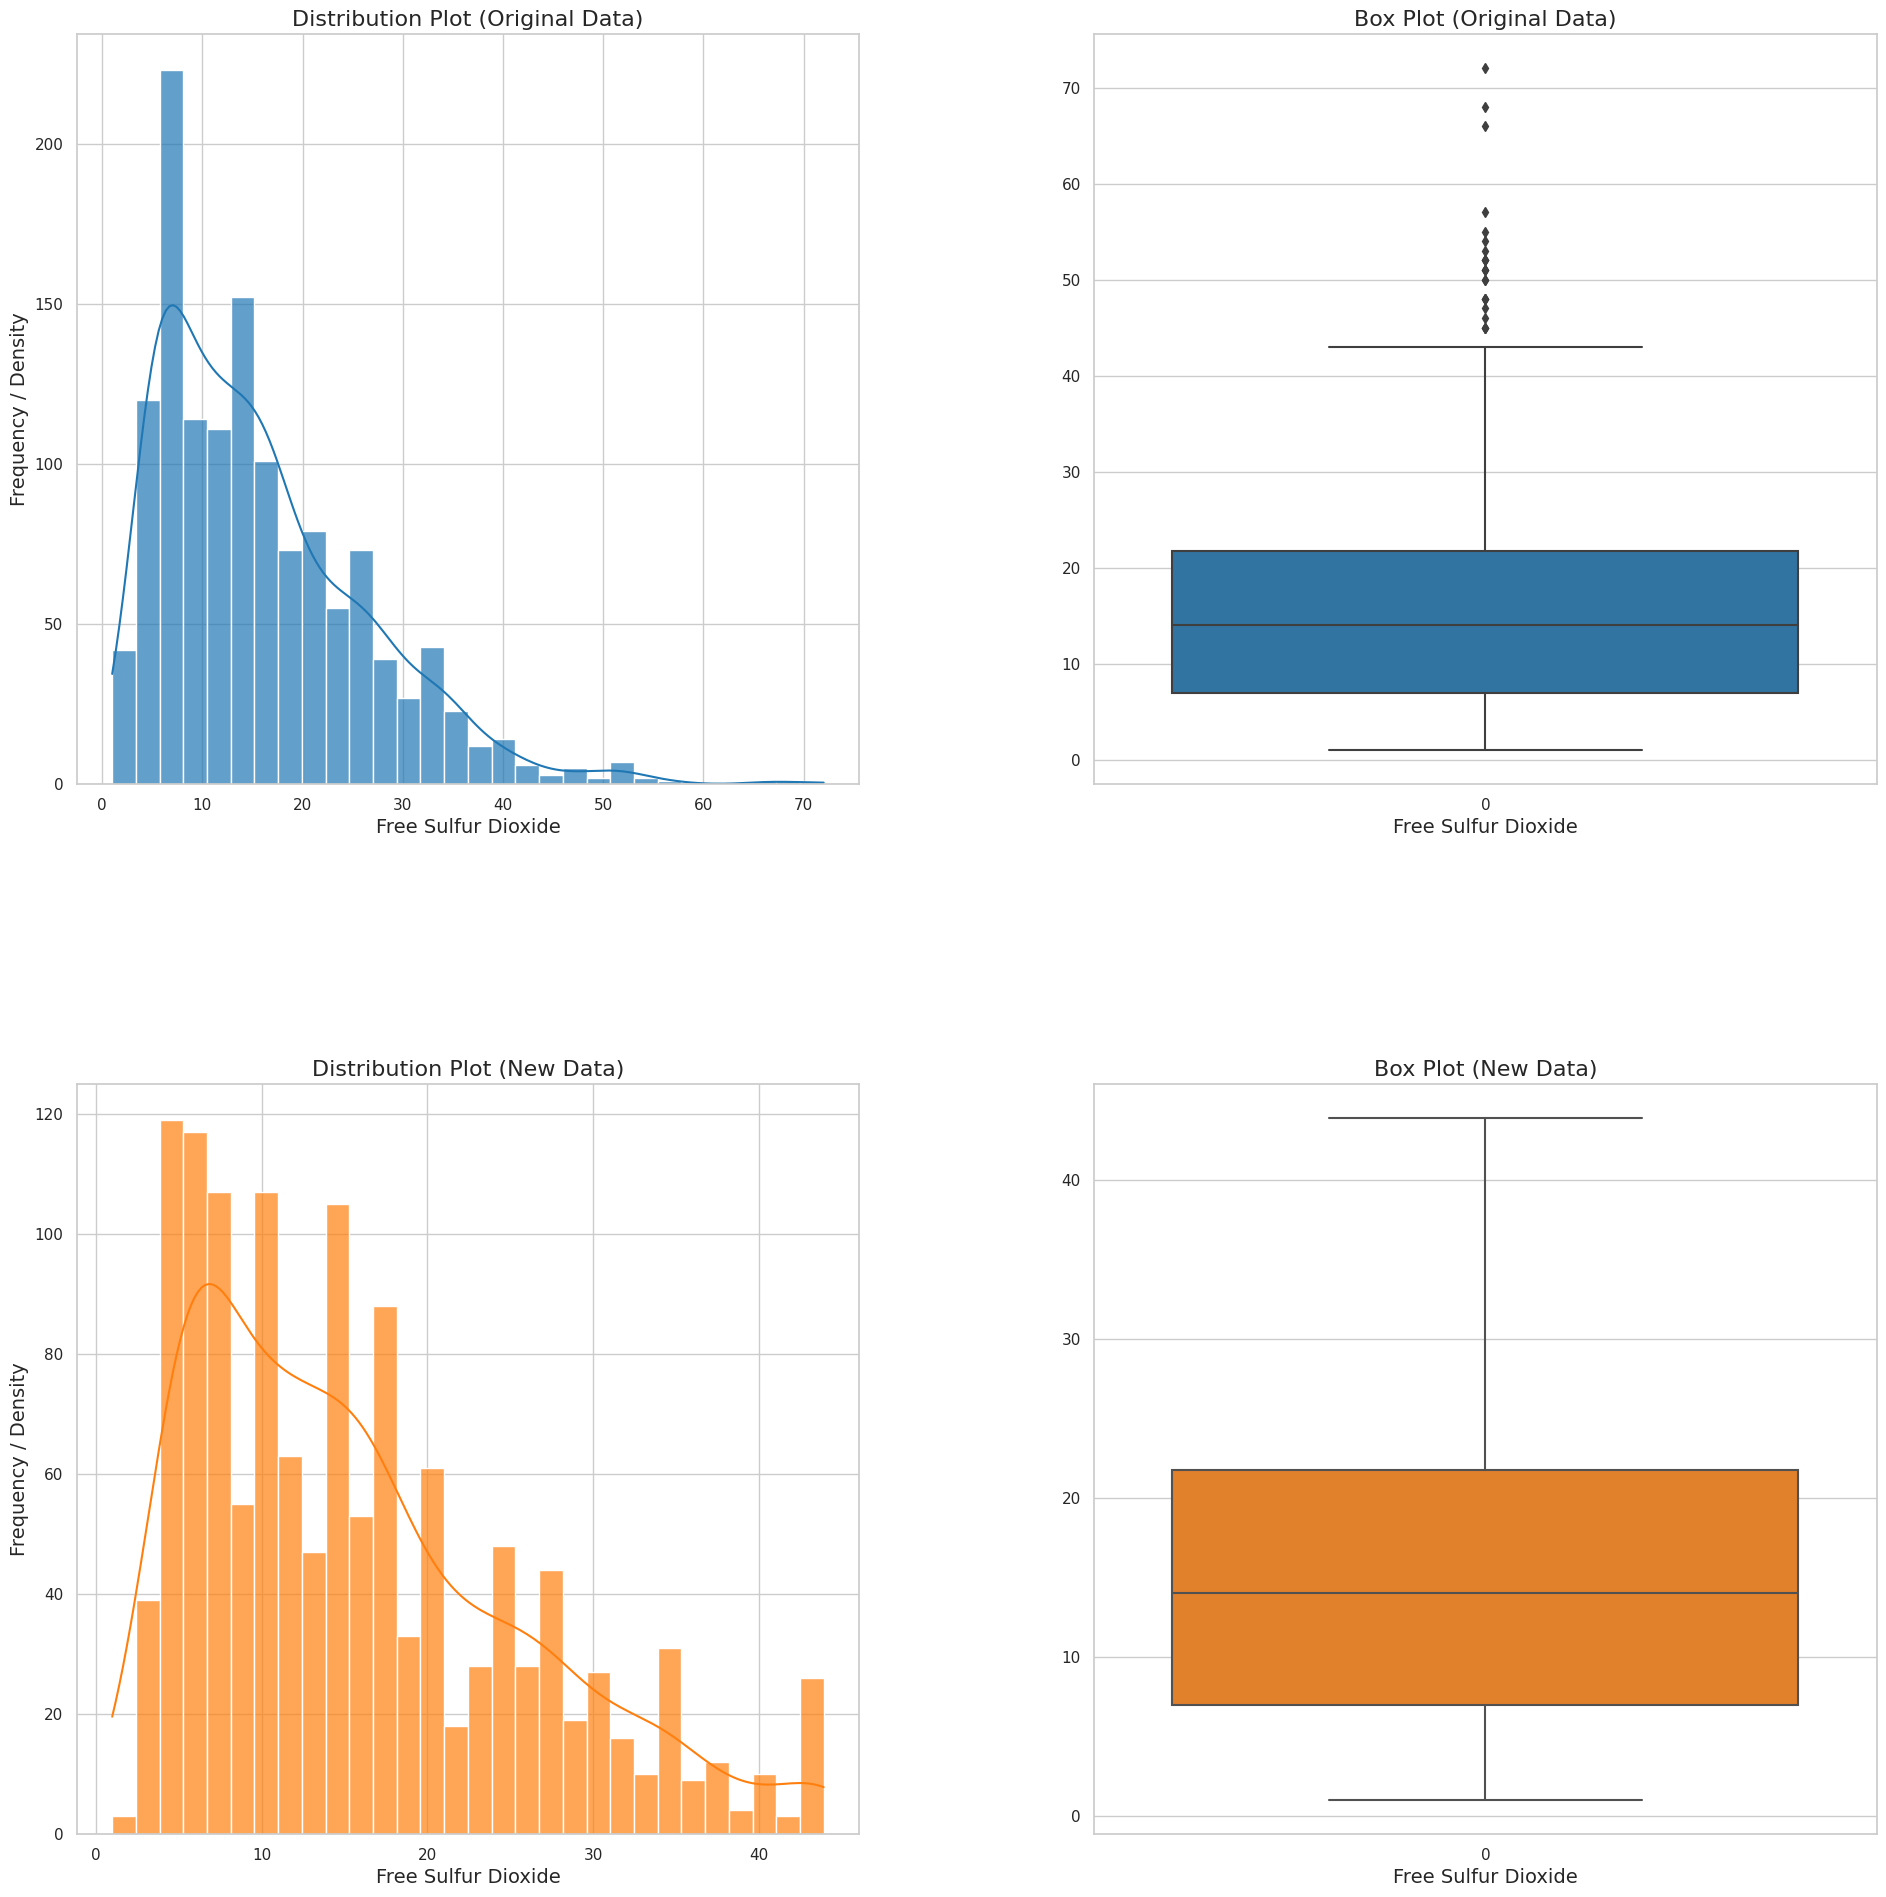

In [77]:
# Define colors
color1 = '#1f77b4'  # Color for original data
color2 = '#ff7f0e'  # Color for new data

# Create a figure and define its size
plt.figure(figsize=(20, 20))

# Plot 1: Distribution plot for original data (free sulfur dioxide)
plt.subplot(2, 2, 1)
sns.histplot(df['free sulfur dioxide'], kde=True, color=color1, bins=30, alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

# Plot 2: Box plot for original data (free sulfur dioxide)
plt.subplot(2, 2, 2)
sns.boxplot(df['free sulfur dioxide'], color=color1)
plt.title('Box Plot (Original Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)

# Plot 3: Distribution plot for new data (free sulfur dioxide new)
plt.subplot(2, 2, 3)
sns.histplot(df['free sulfur dioxide new'], kde=True, color=color2, bins=30, alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

# Plot 4: Box plot for new data (free sulfur dioxide new)
plt.subplot(2, 2, 4)
sns.boxplot(df['free sulfur dioxide new'], color=color2)
plt.title('Box Plot (New Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)

# Manually adjust layout
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

# Show the plots
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


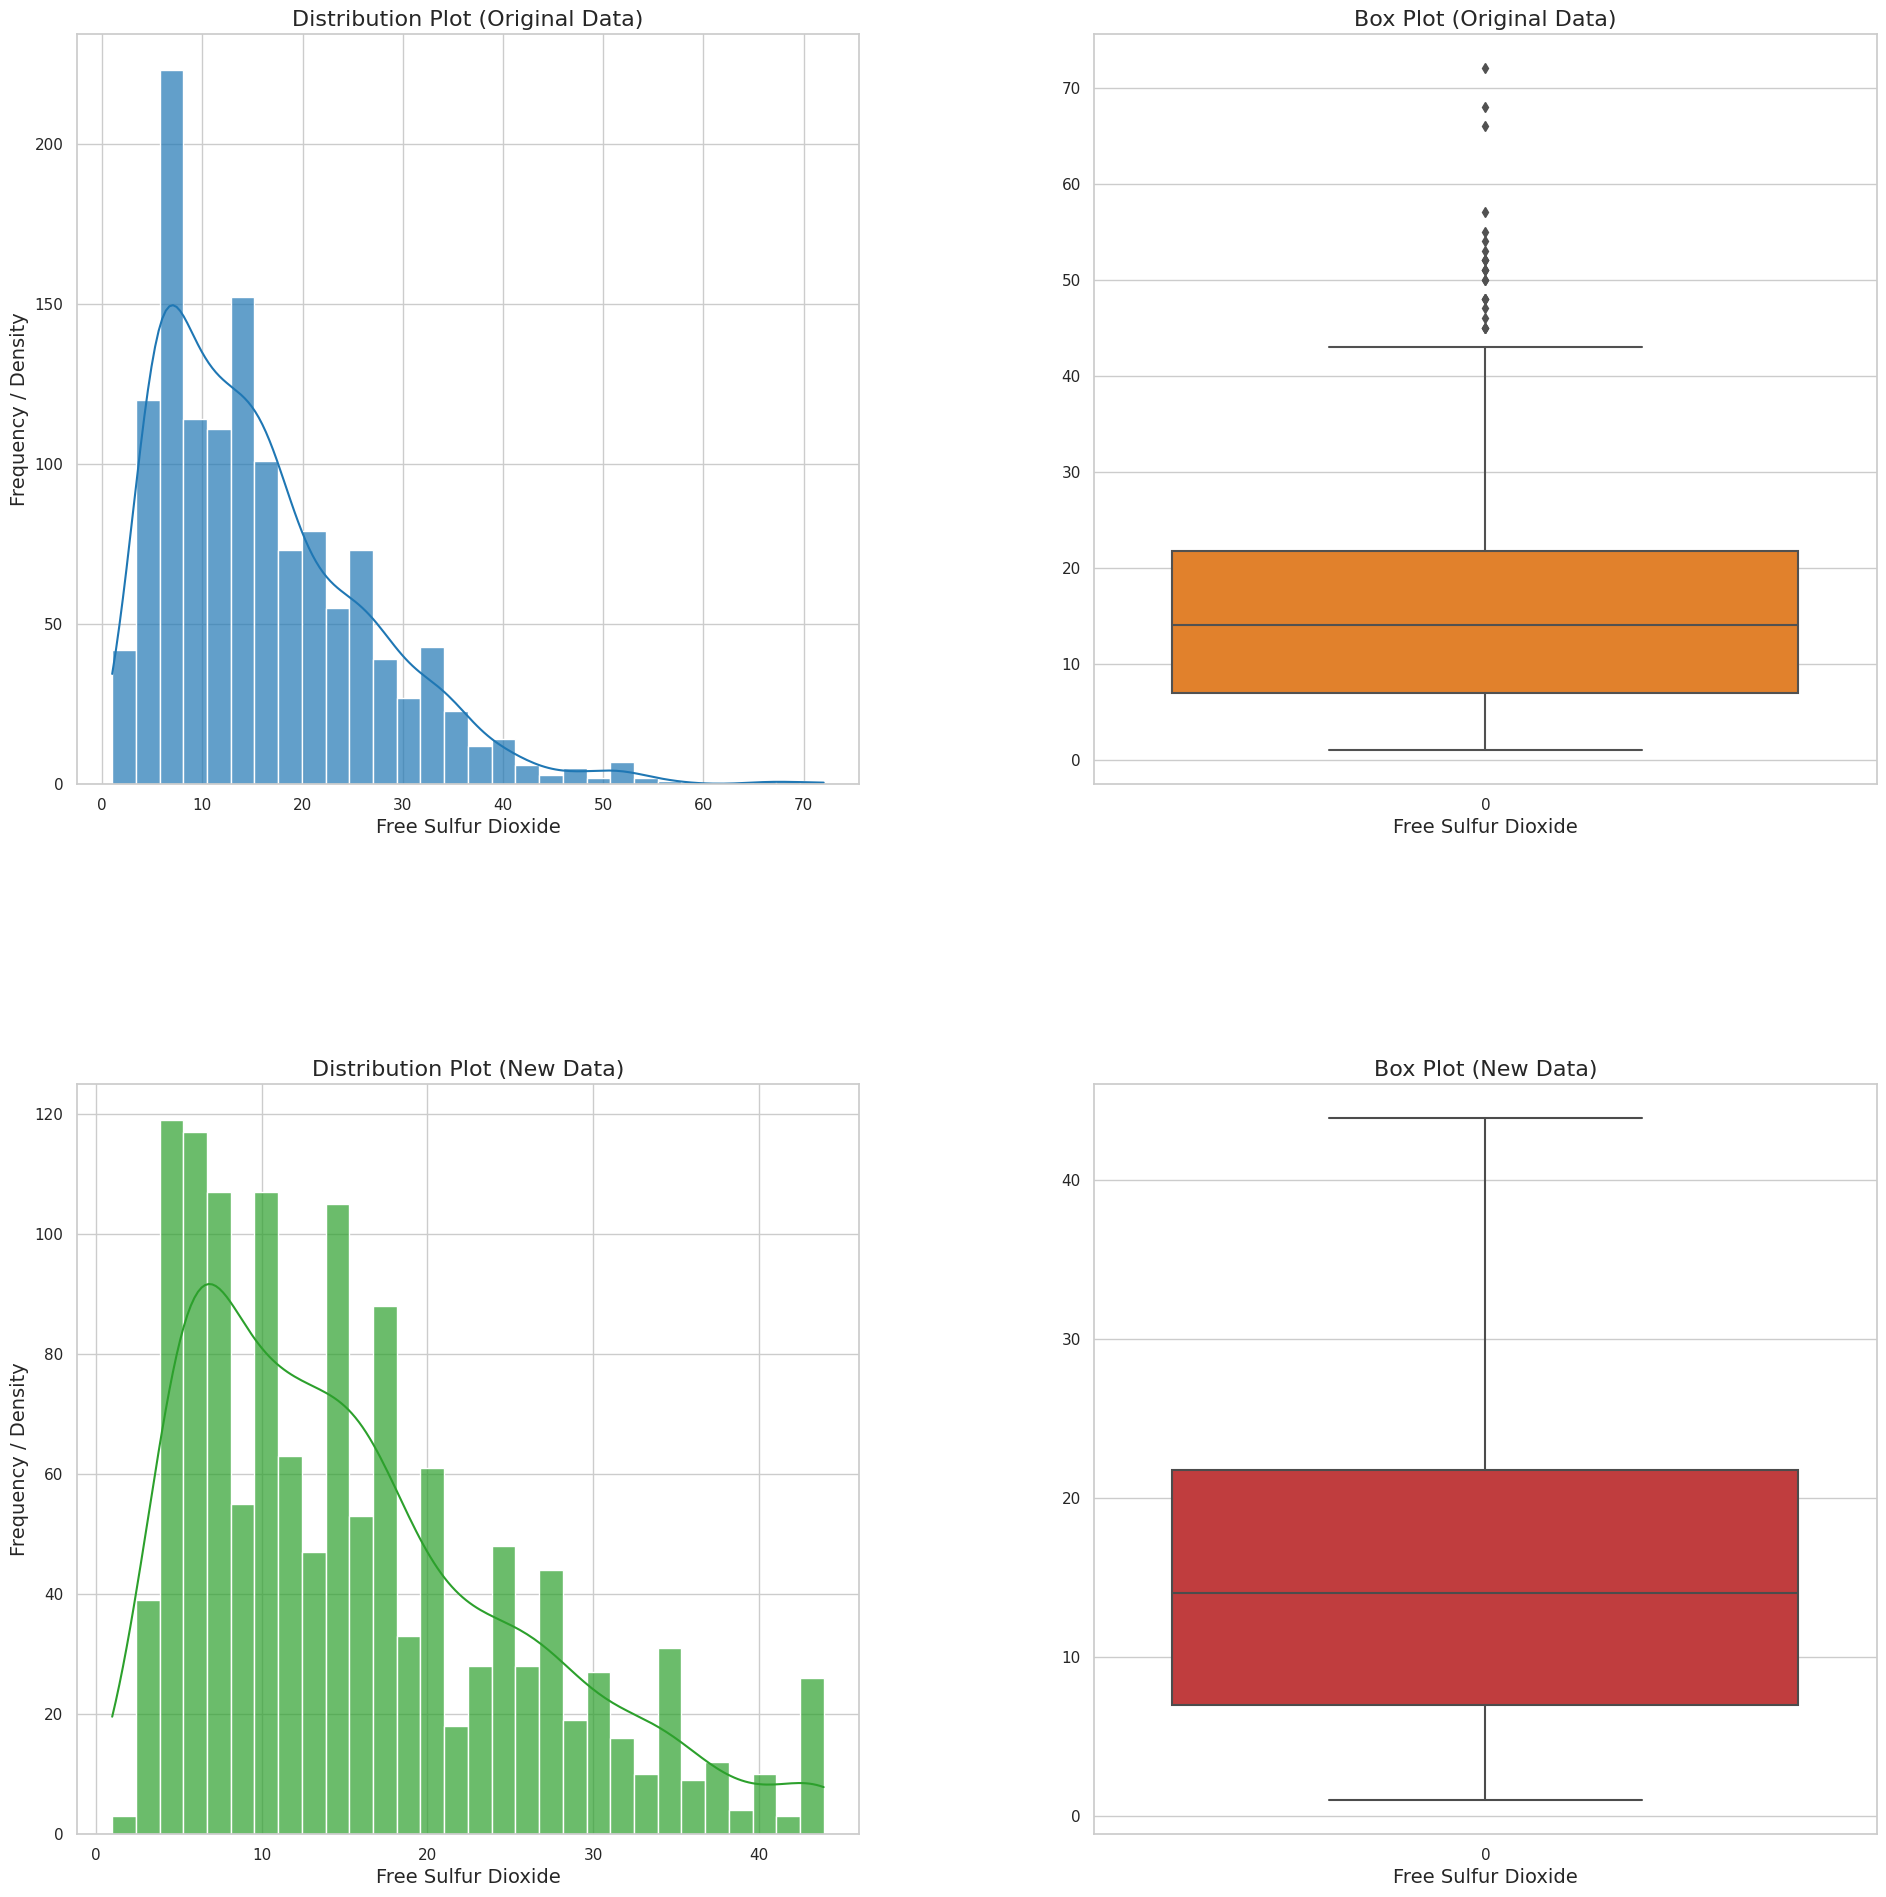

In [78]:
# Define unique colors for each plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a figure and define its size
plt.figure(figsize=(20, 20))

# Plot 1: Distribution plot for original data (free sulfur dioxide)
plt.subplot(2, 2, 1)
sns.histplot(df['free sulfur dioxide'], kde=True, color=colors[0], bins=30, alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

# Plot 2: Box plot for original data (free sulfur dioxide)
plt.subplot(2, 2, 2)
sns.boxplot(df['free sulfur dioxide'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)

# Plot 3: Distribution plot for new data (free sulfur dioxide new)
plt.subplot(2, 2, 3)
sns.histplot(df['free sulfur dioxide new'], kde=True, color=colors[2], bins=30, alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

# Plot 4: Box plot for new data (free sulfur dioxide new)
plt.subplot(2, 2, 4)
sns.boxplot(df['free sulfur dioxide new'], color=colors[3])
plt.title('Box Plot (New Data)', fontsize=16)
plt.xlabel('Free Sulfur Dioxide', fontsize=14)

# Manually adjust layout
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

# Show the plots
plt.show()


In [79]:
df['free sulfur dioxide'].describe(), df['free sulfur dioxide new'].describe()

(count    1330.000000
 mean       15.933835
 std        10.451946
 min         1.000000
 25%         7.000000
 50%        14.000000
 75%        21.750000
 max        72.000000
 Name: free sulfur dioxide, dtype: float64,
 count    1330.000000
 mean       15.785808
 std         9.940165
 min         1.000000
 25%         7.000000
 50%        14.000000
 75%        21.750000
 max        43.875000
 Name: free sulfur dioxide new, dtype: float64)

In [80]:
df['free sulfur dioxide'] = df['free sulfur dioxide new']
df.drop('free sulfur dioxide new', axis=1, inplace=True)

In [81]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
463             8.1              0.66         0.70             2.2      0.098   
1123           10.7              0.40         0.37             1.9      0.081   
1354            7.2              0.58         0.03             2.3      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
463                  25.0                 129.0  0.99720  3.08       0.53   
1123                 17.0                  29.0  0.99674  3.12       0.65   
1354                  7.0                  28.0  0.99568  3.35       0.52   

      alcohol  quality  
463       9.0        5  
1123     11.2        6  
1354     10.0        5

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


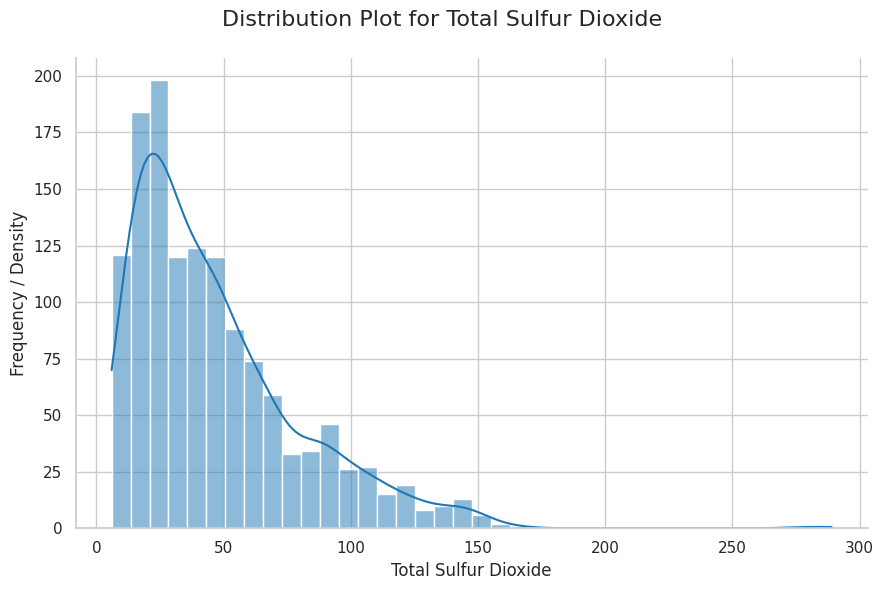

In [82]:
# Create the displot
g = sns.displot(df['total sulfur dioxide'], kde=True, color='#1f77b4', height=6, aspect=1.5)

# Add title and labels
g.set_axis_labels('Total Sulfur Dioxide', 'Frequency / Density')
g.fig.suptitle('Distribution Plot for Total Sulfur Dioxide', fontsize=16)

# Manually adjust the layout to avoid warnings
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


<Axes: xlabel='total sulfur dioxide'>

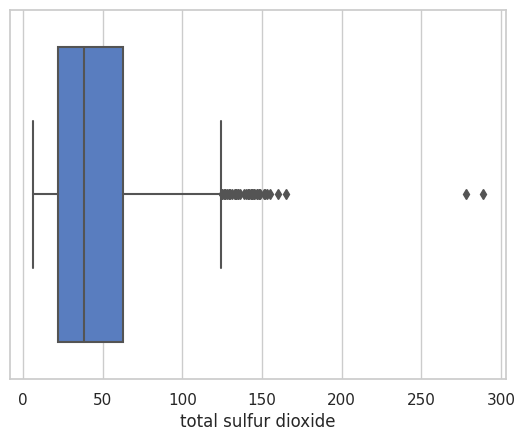

In [83]:
sns.boxplot(data=df, x='total sulfur dioxide')

In [84]:
find_outliers_using_interquartile_range(df, 'total sulfur dioxide')

(44, 12)

In [85]:
df = remove_outliers_using_caping(df, 'total sulfur dioxide')

124.5 -39.5


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


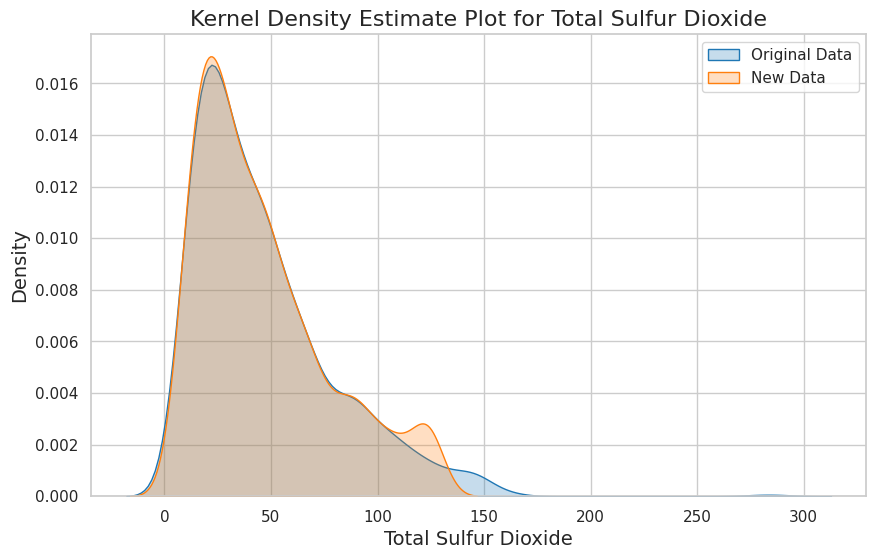

In [86]:
# Define colors
color1 = '#1f77b4'  # Color for original data
color2 = '#ff7f0e'  # Color for new data

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot KDE plots for both original and new data
sns.kdeplot(df['total sulfur dioxide'], color=color1, fill=True, label='Original Data')
sns.kdeplot(df['total sulfur dioxide new'], color=color2, fill=True, label='New Data')

# Add title and labels
plt.title('Kernel Density Estimate Plot for Total Sulfur Dioxide', fontsize=16)
plt.xlabel('Total Sulfur Dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend()

# Show plot
plt.show()


In [87]:
df['total sulfur dioxide'] = df['total sulfur dioxide new']
df.drop('total sulfur dioxide new', axis=1, inplace=True)

In [88]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1395            8.6             0.685         0.10             1.6      0.092   
1473            6.1             0.600         0.08             1.8      0.071   
1293            7.5             0.755         0.00             1.9      0.084   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1395                  3.0                  12.0  0.99745  3.31       0.65   
1473                 14.0                  45.0  0.99336  3.38       0.54   
1293                  6.0                  12.0  0.99672  3.34       0.49   

      alcohol  quality  
1395     9.55        6  
1473    11.00        5  
1293     9.70        4

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


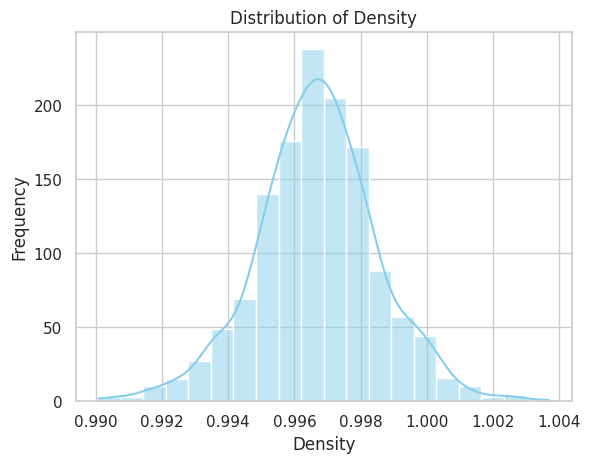

In [89]:
# Assuming 'df' is your DataFrame containing the 'density' column
sns.histplot(df['density'], kde=True, color='skyblue', bins=20)  # Adjust bins as needed
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Distribution of Density')
plt.show()


<Axes: xlabel='density'>

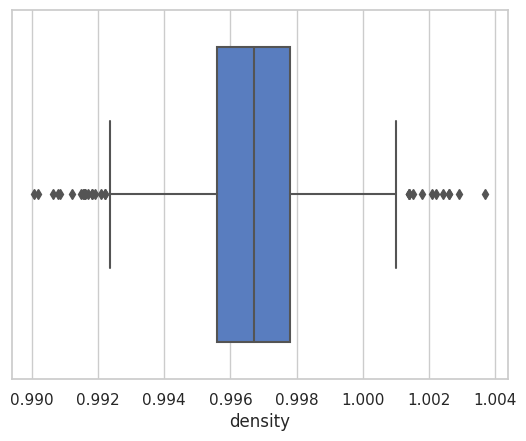

In [90]:
sns.boxplot(data=df, x='density')

In [91]:
find_outliers_using_three_sigma_rule(df, 'density')

(11, 12)

In [92]:
new_df = remove_outliers_using_three_sigma_rule(df, 'density')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


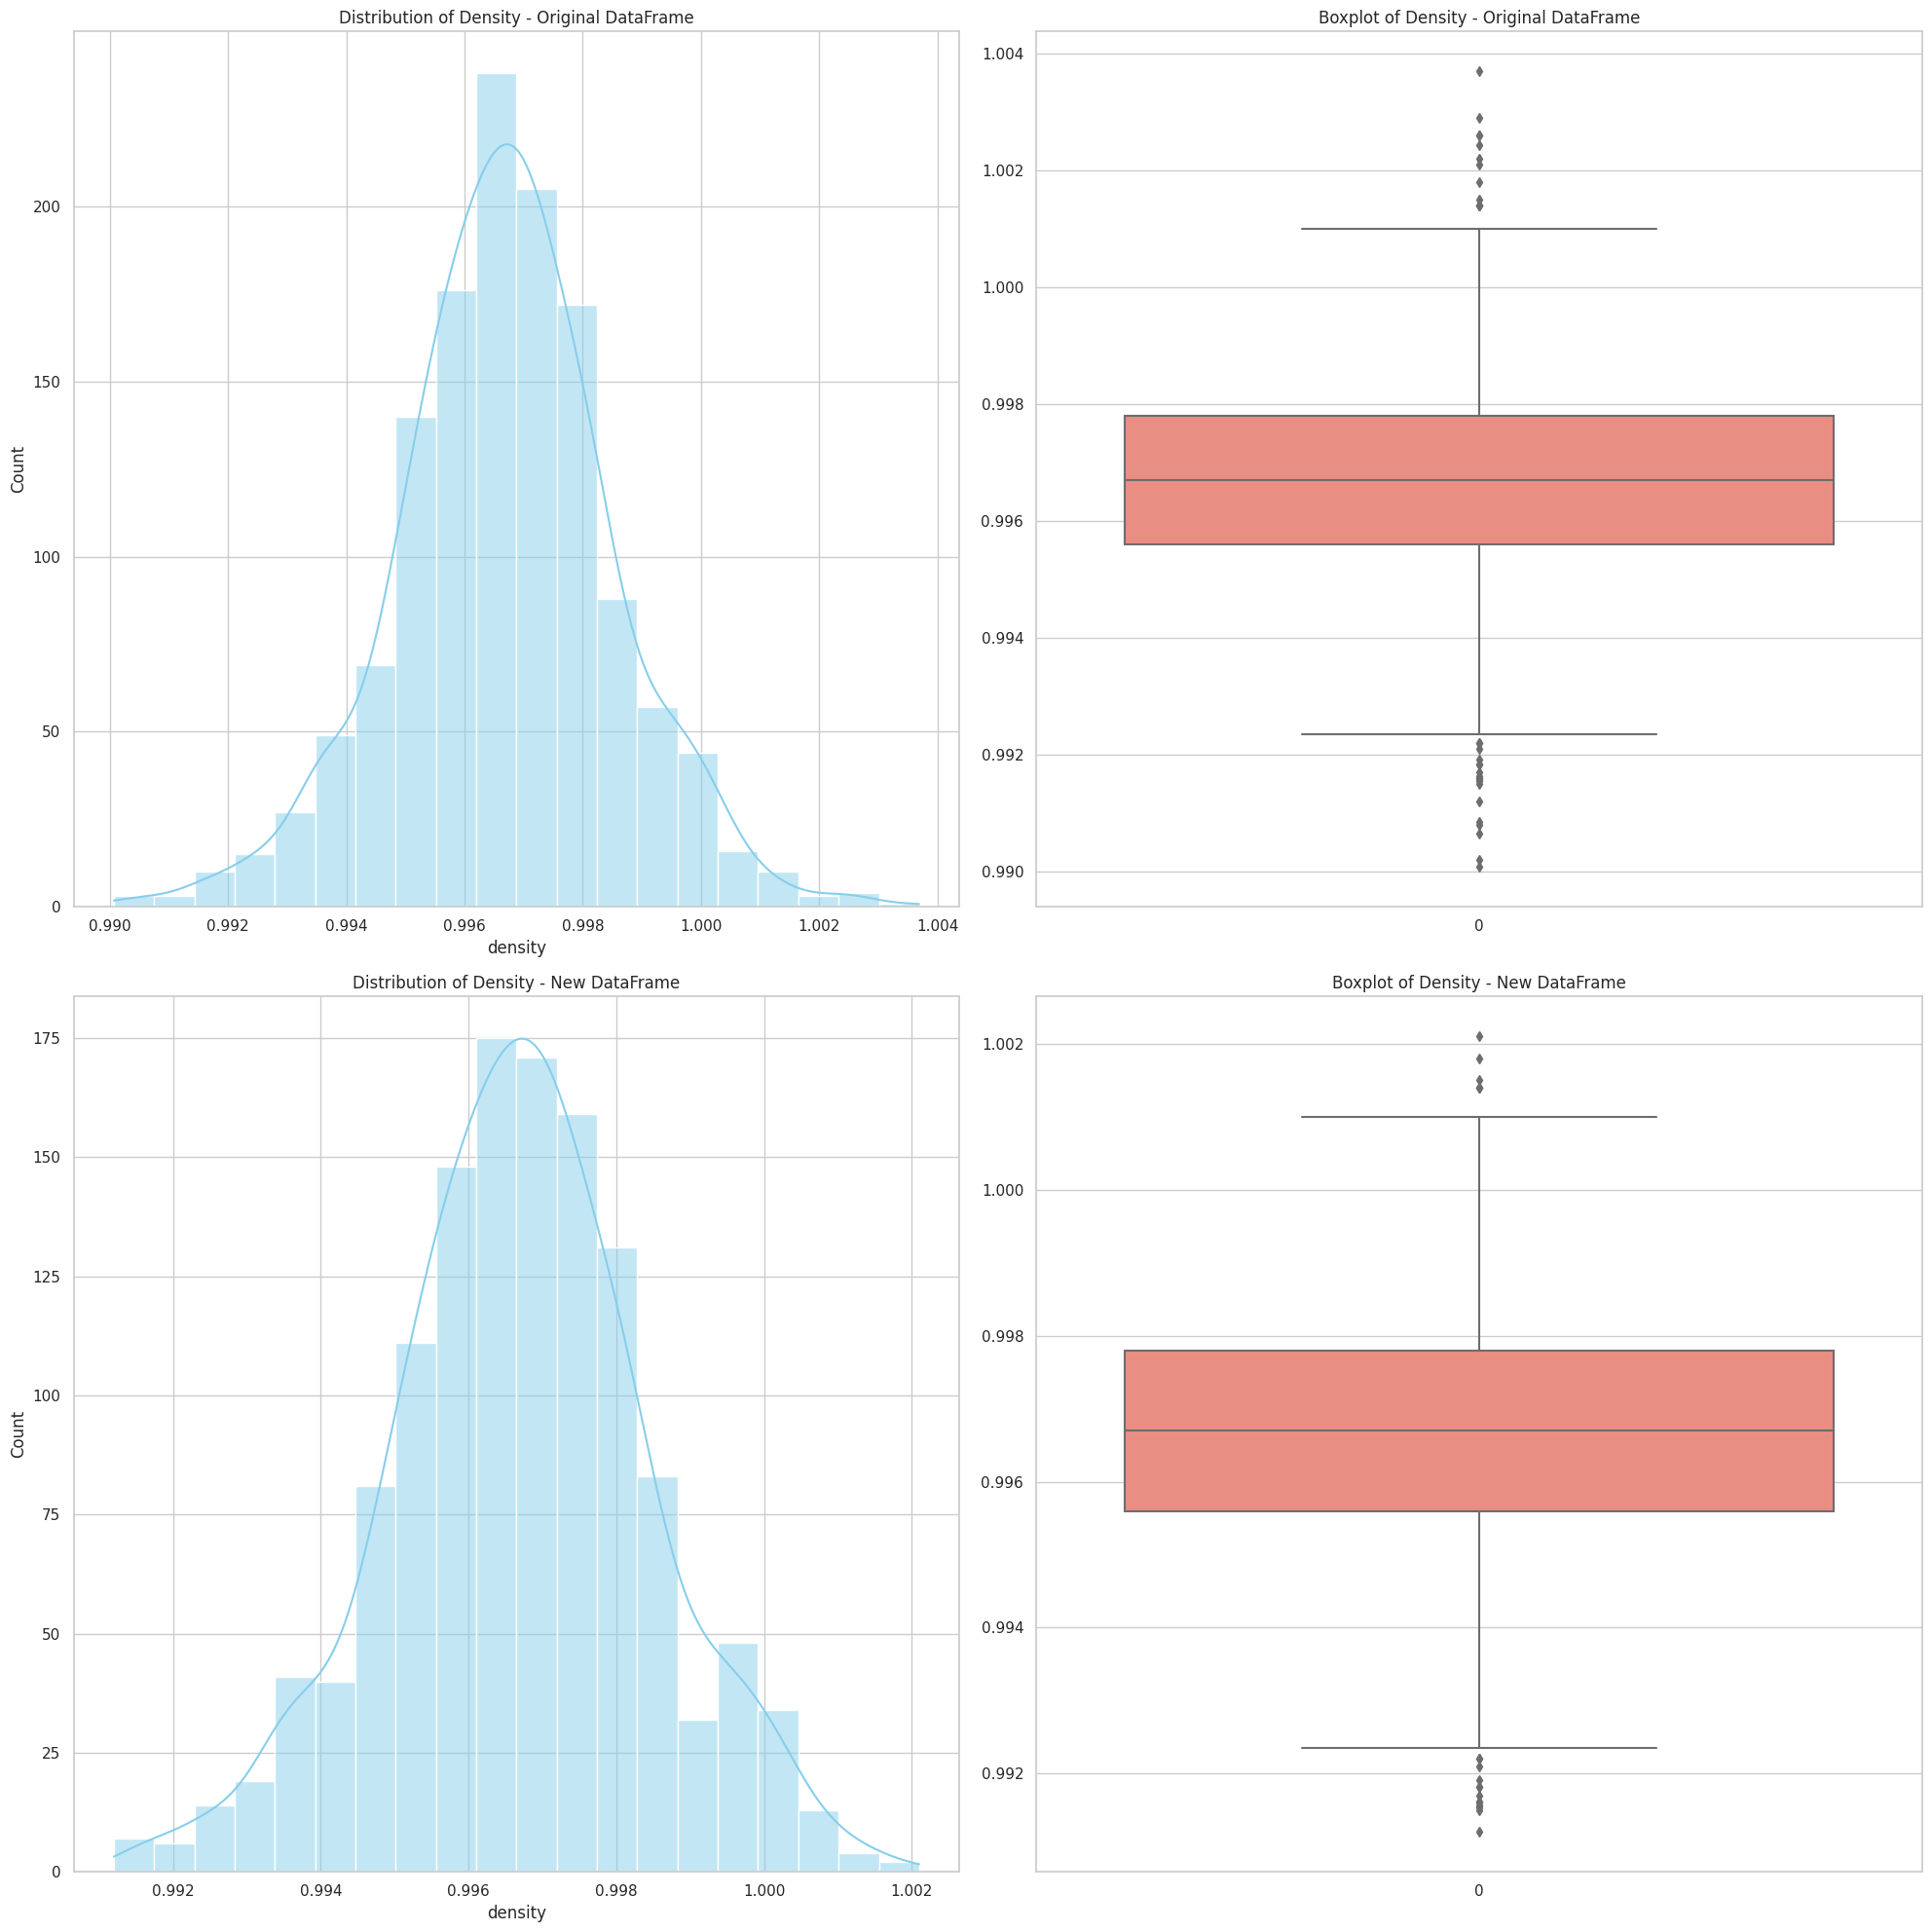

In [93]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['density'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Density - Original DataFrame')

plt.subplot(2, 2, 2)
sns.boxplot(df['density'], color='salmon')
plt.title('Boxplot of Density - Original DataFrame')

plt.subplot(2, 2, 3)
sns.histplot(new_df['density'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Density - New DataFrame')

plt.subplot(2, 2, 4)
sns.boxplot(new_df['density'], color='salmon')
plt.title('Boxplot of Density - New DataFrame')

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


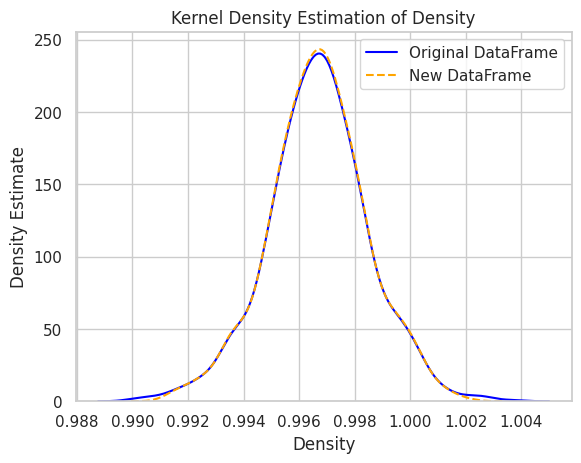

In [94]:
# Plotting kernel density estimation plots without histogram
sns.kdeplot(df['density'], color='blue', label='Original DataFrame', linestyle='-')
sns.kdeplot(new_df['density'], color='orange', label='New DataFrame', linestyle='--')

# Adding labels and title
plt.xlabel('Density')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of Density')
plt.legend()

plt.show()


In [95]:
df = new_df

In [96]:
df.sample(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1541            7.4              0.25         0.29             2.2      0.054   

      free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
1541                 19.0                  49.0  0.99666  3.4       0.76   

      alcohol  quality  
1541     10.9        7

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


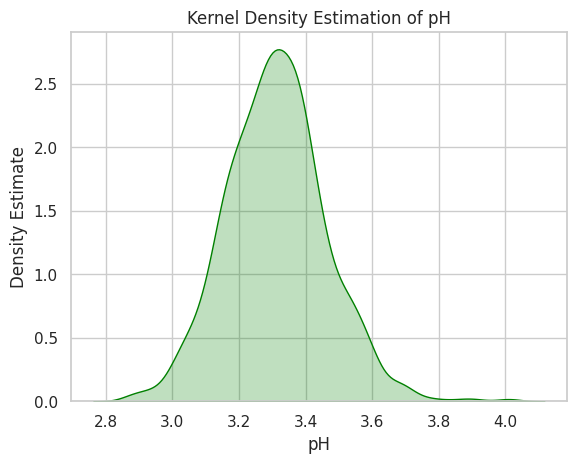

In [97]:
# Plotting kernel density estimation plot for pH column
sns.kdeplot(df['pH'], color='green', fill=True)

# Adding labels and title
plt.xlabel('pH')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of pH')

plt.show()


<Axes: xlabel='pH'>

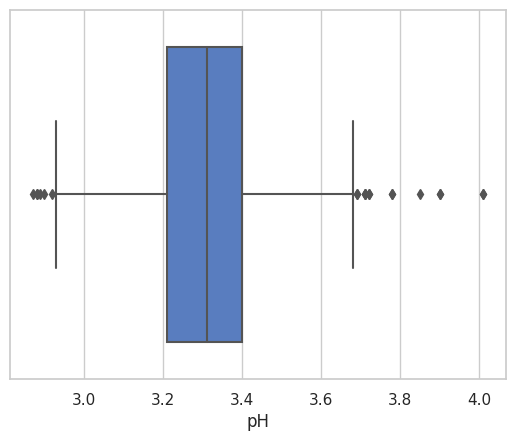

In [98]:
sns.boxplot(data=df, x='pH')

In [99]:
find_outliers_using_three_sigma_rule(df, 'pH')

(7, 12)

In [100]:
new_df = remove_outliers_using_three_sigma_rule(df, 'pH')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


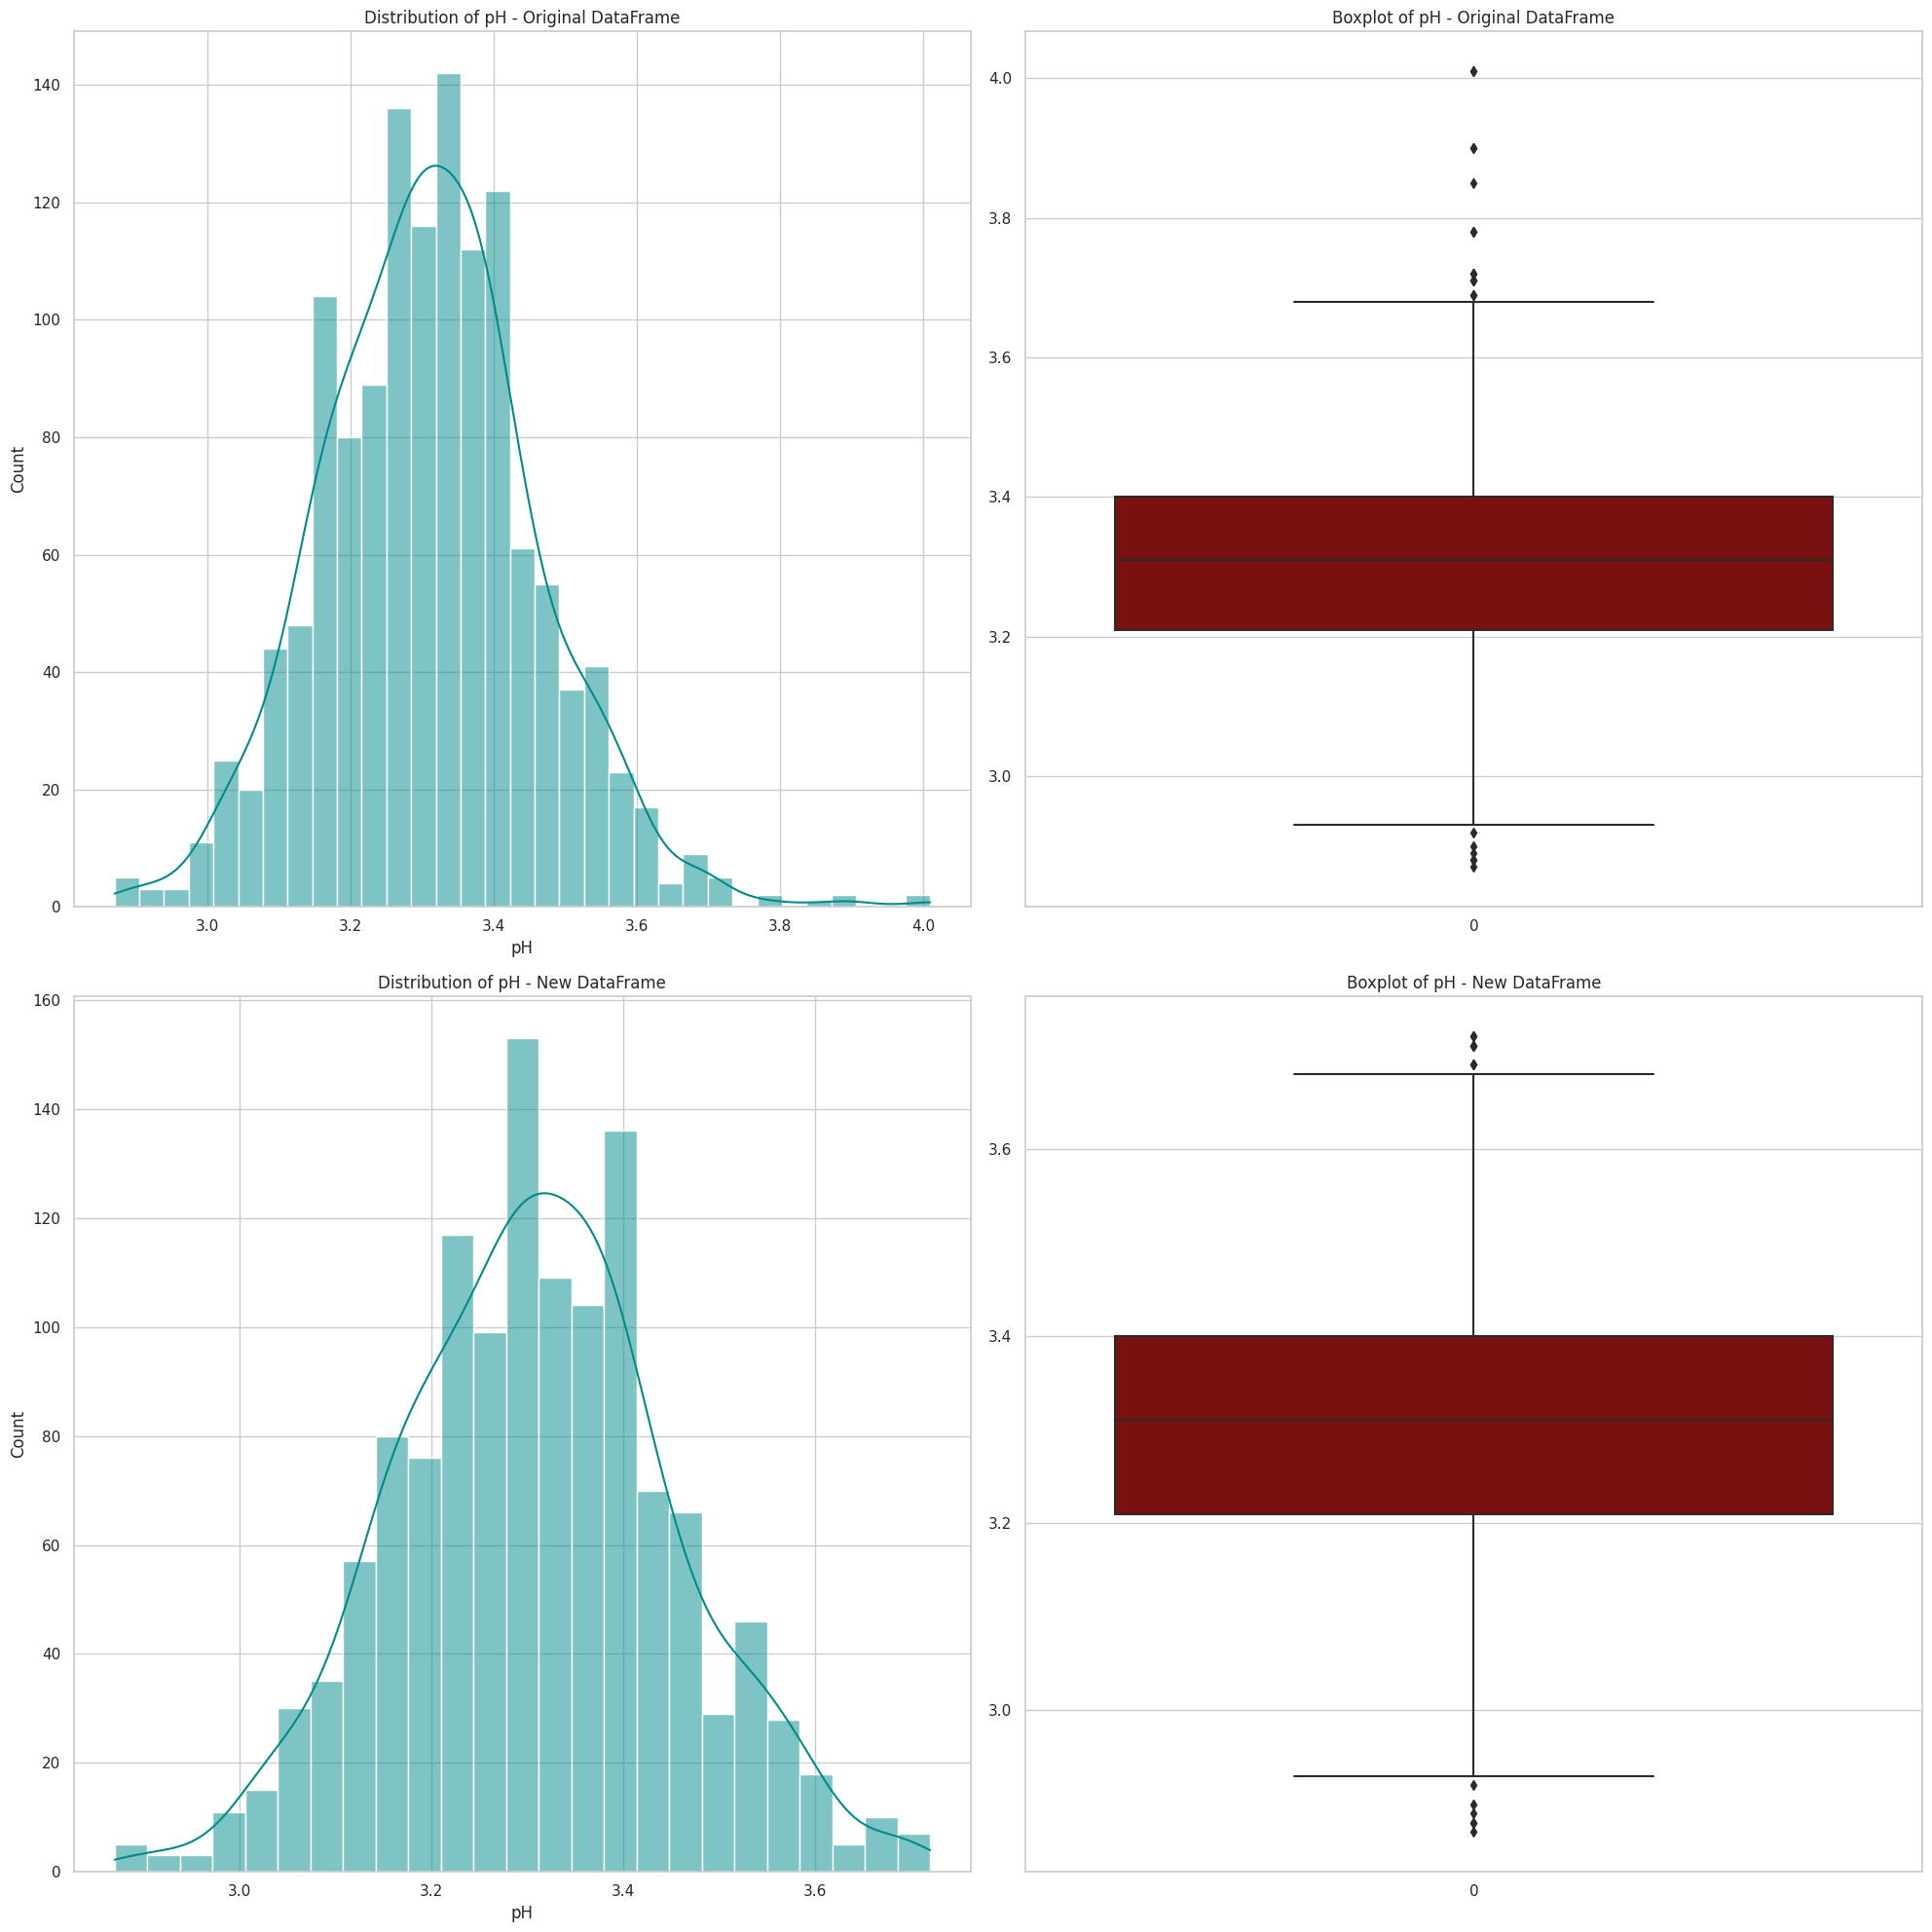

In [101]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['pH'], kde=True, color='darkcyan')
plt.title('Distribution of pH - Original DataFrame')

plt.subplot(2, 2, 2)
sns.boxplot(df['pH'], color='darkred')
plt.title('Boxplot of pH - Original DataFrame')

plt.subplot(2, 2, 3)
sns.histplot(new_df['pH'], kde=True, color='darkcyan')
plt.title('Distribution of pH - New DataFrame')

plt.subplot(2, 2, 4)
sns.boxplot(new_df['pH'], color='darkred')
plt.title('Boxplot of pH - New DataFrame')

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


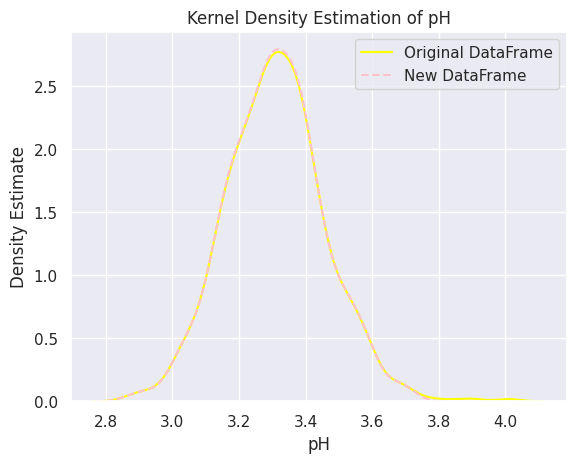

In [102]:
# Setting a dark background style
sns.set_style("darkgrid")

# Plotting kernel density estimation plots without histogram
sns.kdeplot(df['pH'], color='yellow', label='Original DataFrame', linestyle='-')
sns.kdeplot(new_df['pH'], color='pink', label='New DataFrame', linestyle='--')

# Adding labels and title
plt.xlabel('pH')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of pH')
plt.legend()

plt.show()


In [103]:
df.sample(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
620            8.3              0.54         0.24             3.4      0.076   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
620                 16.0                 112.0   0.9976  3.27       0.61   

     alcohol  quality  
620      9.4        5

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


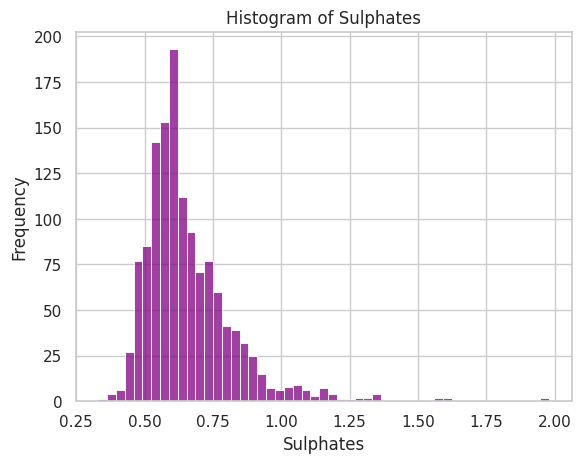

In [104]:
# Create a histogram for the 'sulphates' column
sns.set_style("whitegrid")  # Setting the style
sns.histplot(df['sulphates'], color='purple', kde=False)  # Plotting the histogram without kernel density estimation
plt.xlabel('Sulphates')  # Adding label for x-axis
plt.ylabel('Frequency')  # Adding label for y-axis
plt.title('Histogram of Sulphates')  # Adding title to the plot
plt.show()  # Display the plot


<Axes: xlabel='sulphates'>

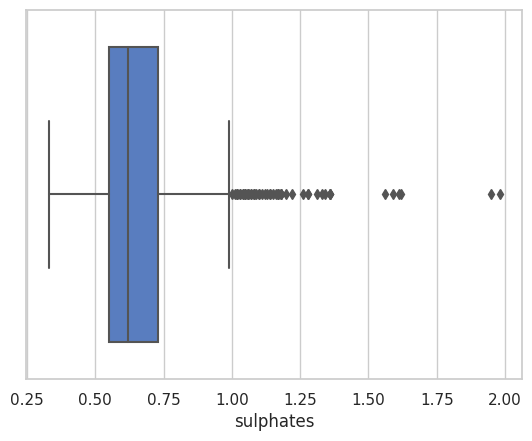

In [105]:
sns.boxplot(data=df, x='sulphates')

In [106]:
find_outliers_using_three_sigma_rule(df, 'sulphates')

(23, 12)

In [107]:
find_outliers_using_interquartile_range(df, 'sulphates')

(54, 12)

In [108]:
df['sulphates'].skew()

2.2459730570986696

In [109]:
df = remove_outliers_using_caping(df, 'sulphates')

0.9999999999999999 0.28000000000000014


/tmp/ipykernel_18/1949289333.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+' new'] = np.where(df[feature] > upper_bound, upper_bound,


In [110]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
181            8.9              0.61         0.49             2.0   0.087706   
268            6.9              0.54         0.04             3.0   0.077000   
90             7.9              0.52         0.26             1.9   0.079000   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
181                 23.0                 110.0   0.9972  3.12       1.02   
268                  7.0                  27.0   0.9987  3.69       0.91   
90                  42.0                 124.5   0.9964  3.23       0.54   

     alcohol  quality  sulphates new  
181      9.3        5           1.00  
268      9.4        6           0.91  
90       9.5        5           0.54

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


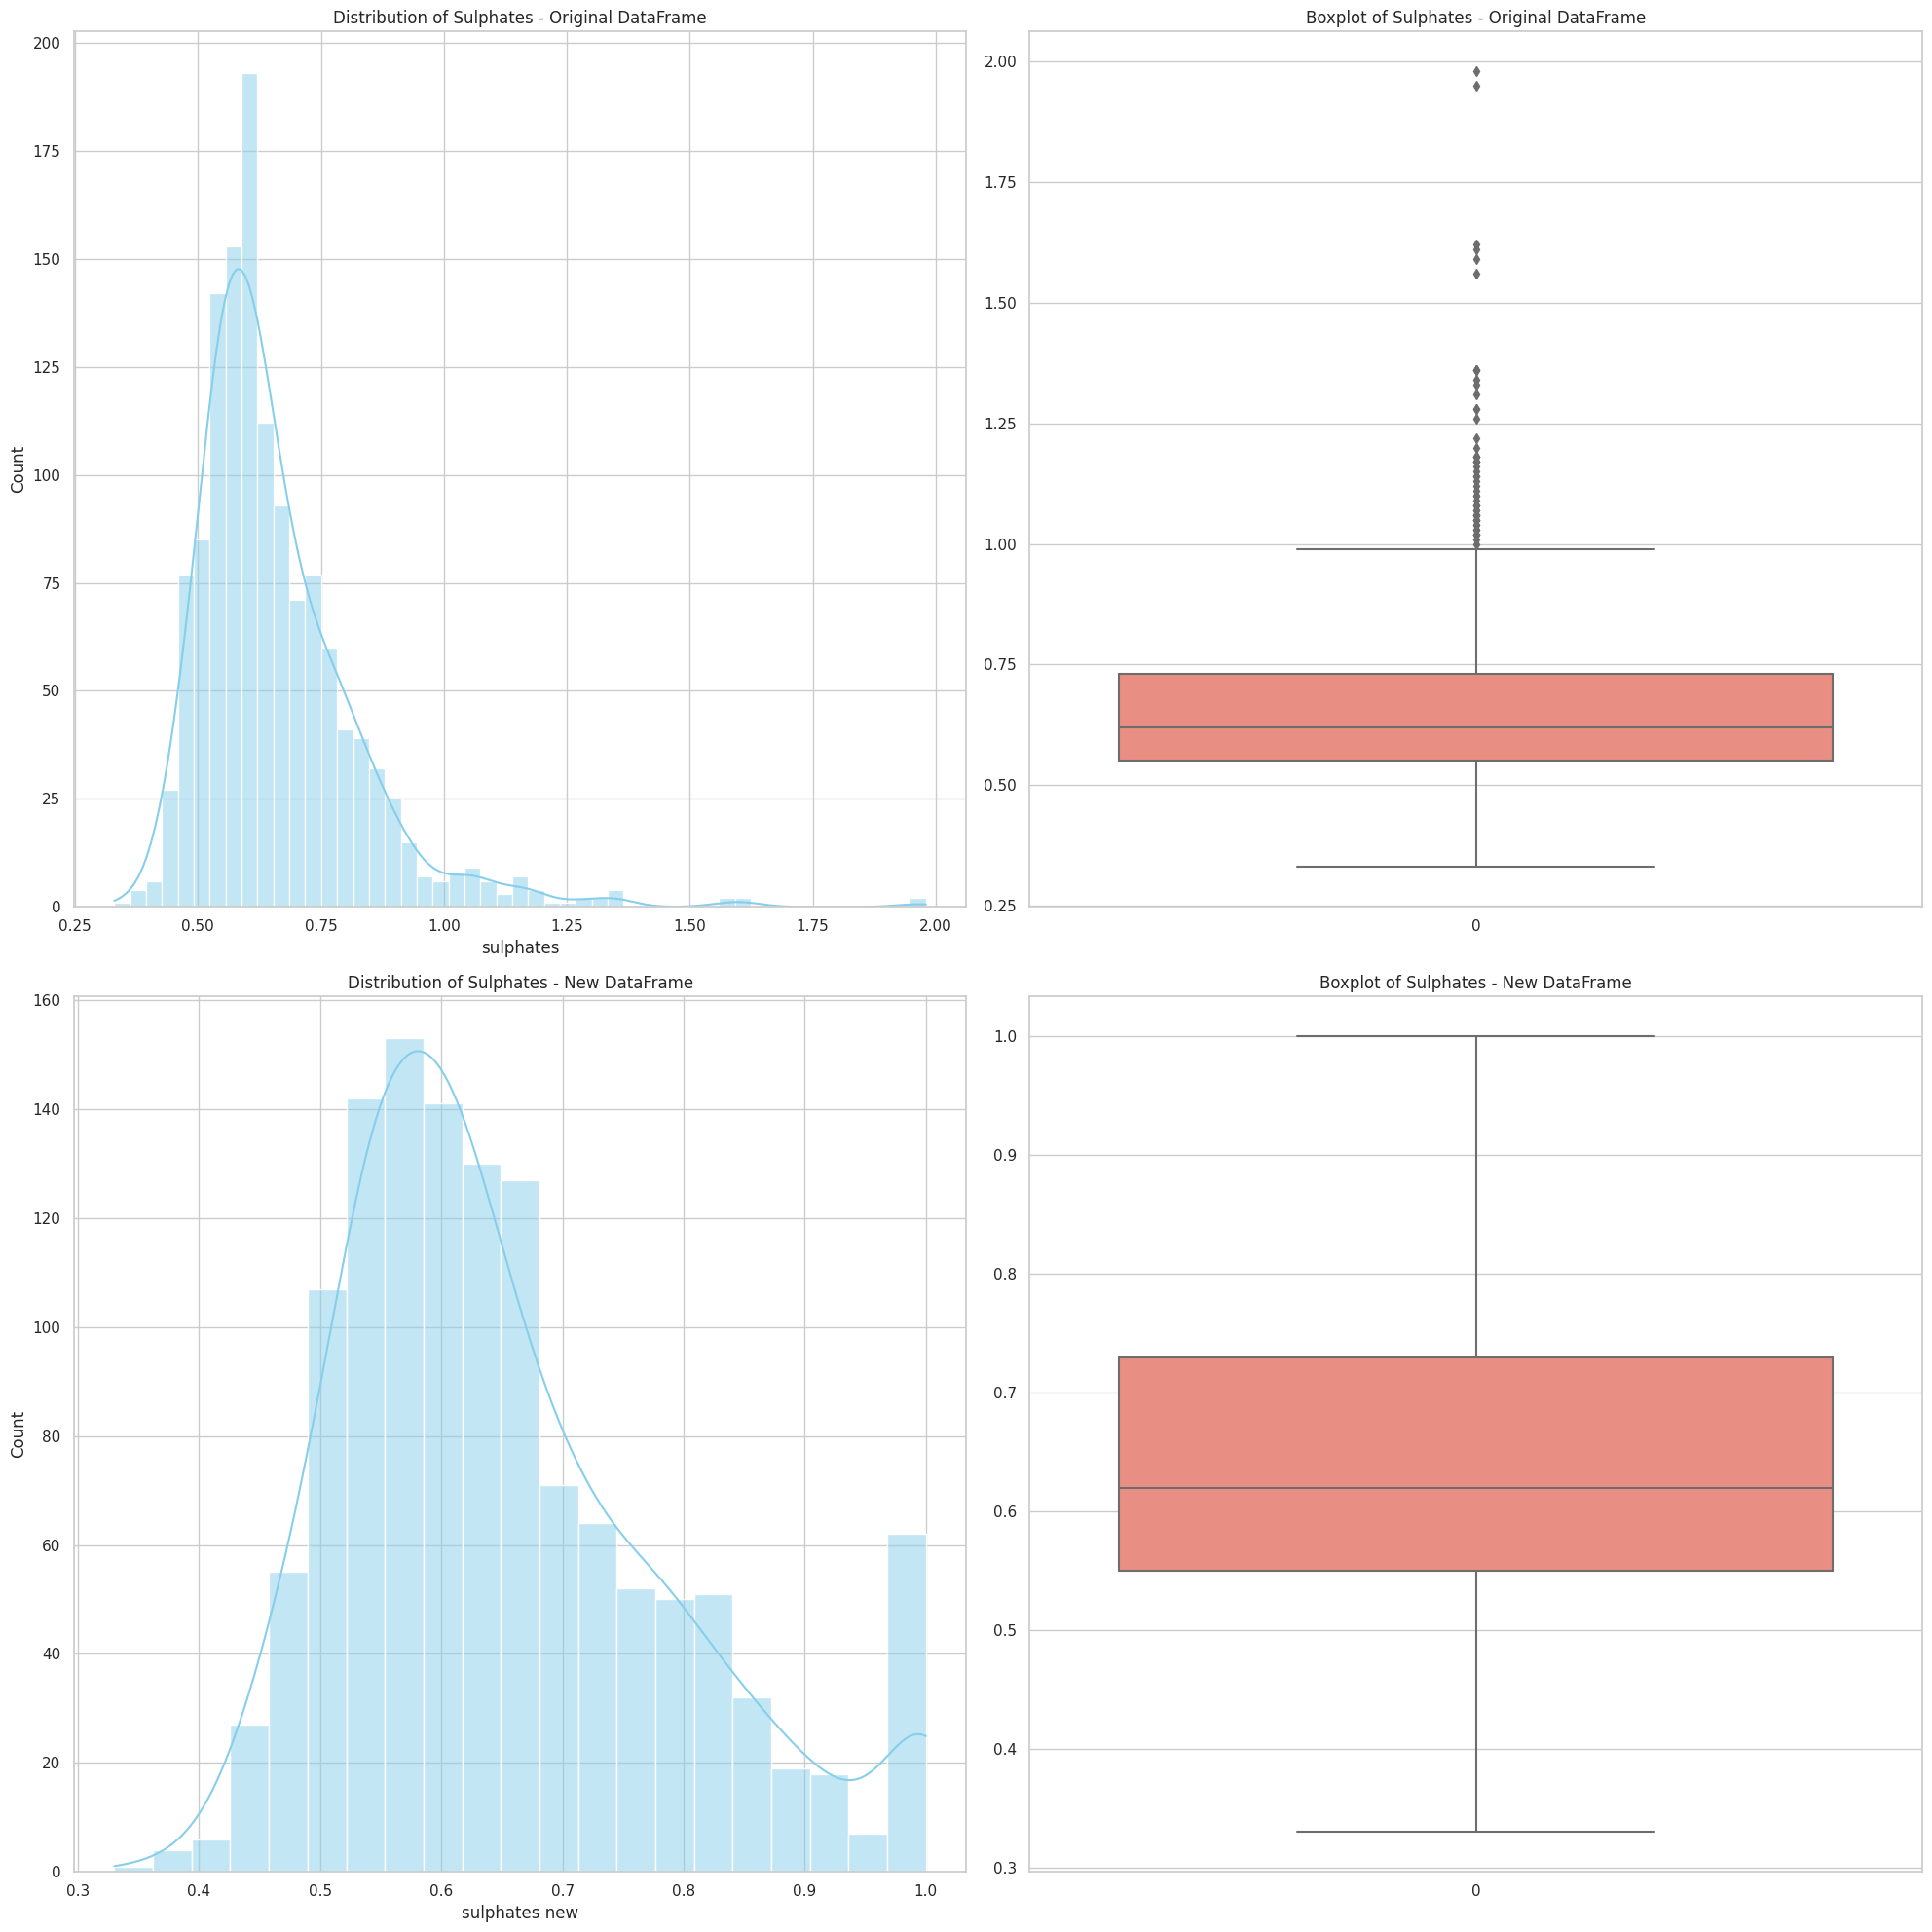

In [111]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['sulphates'], kde=True, color='skyblue')
plt.title('Distribution of Sulphates - Original DataFrame')

plt.subplot(2, 2, 2)
sns.boxplot(df['sulphates'], color='salmon')
plt.title('Boxplot of Sulphates - Original DataFrame')

plt.subplot(2, 2, 3)
sns.histplot(df['sulphates new'], kde=True, color='skyblue')
plt.title('Distribution of Sulphates - New DataFrame')

plt.subplot(2, 2, 4)
sns.boxplot(df['sulphates new'], color='salmon')
plt.title('Boxplot of Sulphates - New DataFrame')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


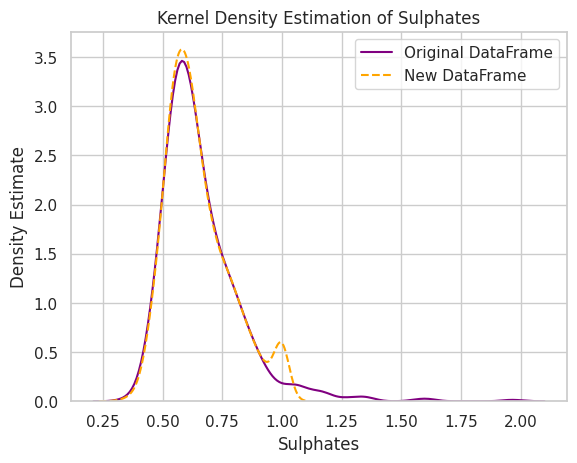

In [112]:
# Plot kernel density estimation plots without histogram
sns.kdeplot(df['sulphates'], color='purple', label='Original DataFrame', linestyle='-')
sns.kdeplot(df['sulphates new'], color='orange', label='New DataFrame', linestyle='--')

# Add labels and title
plt.xlabel('Sulphates')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of Sulphates')
plt.legend()

plt.show()


In [113]:
df.loc[:, 'sulphates'] = df['sulphates new']
df.drop('sulphates new', axis=1, inplace=True)

/tmp/ipykernel_18/969417559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('sulphates new', axis=1, inplace=True)


In [114]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1239            6.5              0.67         0.00        2.515677      0.057   
585             7.6              0.51         0.24        2.400000      0.091   
1398            7.0              0.60         0.12        2.200000      0.083   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1239                 11.0                  20.0  0.99488  3.45       0.56   
585                   8.0                  38.0  0.99800  3.47       0.66   
1398                 13.0                  28.0  0.99660  3.52       0.62   

      alcohol  quality  
1239     11.8        4  
585       9.6        6  
1398     10.2        7

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


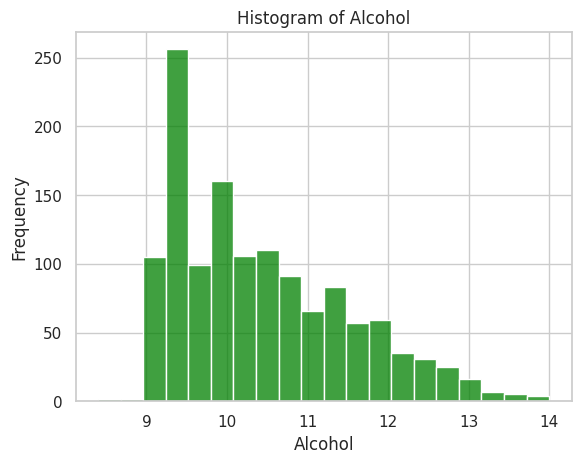

In [115]:
# Create a histogram for the 'alcohol' column
sns.histplot(df['alcohol'], color='green', kde=False)

# Add labels and title
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol')

plt.show()


<Axes: xlabel='alcohol'>

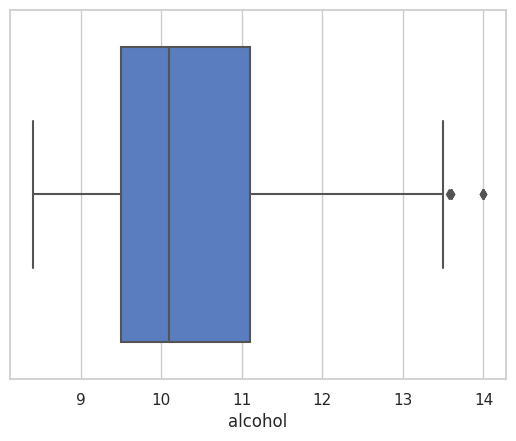

In [116]:
sns.boxplot(data=df, x='alcohol')

In [117]:
find_outliers_using_three_sigma_rule(df, 'alcohol')

(4, 12)

In [118]:
new_df = remove_outliers_using_three_sigma_rule(df, 'alcohol')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


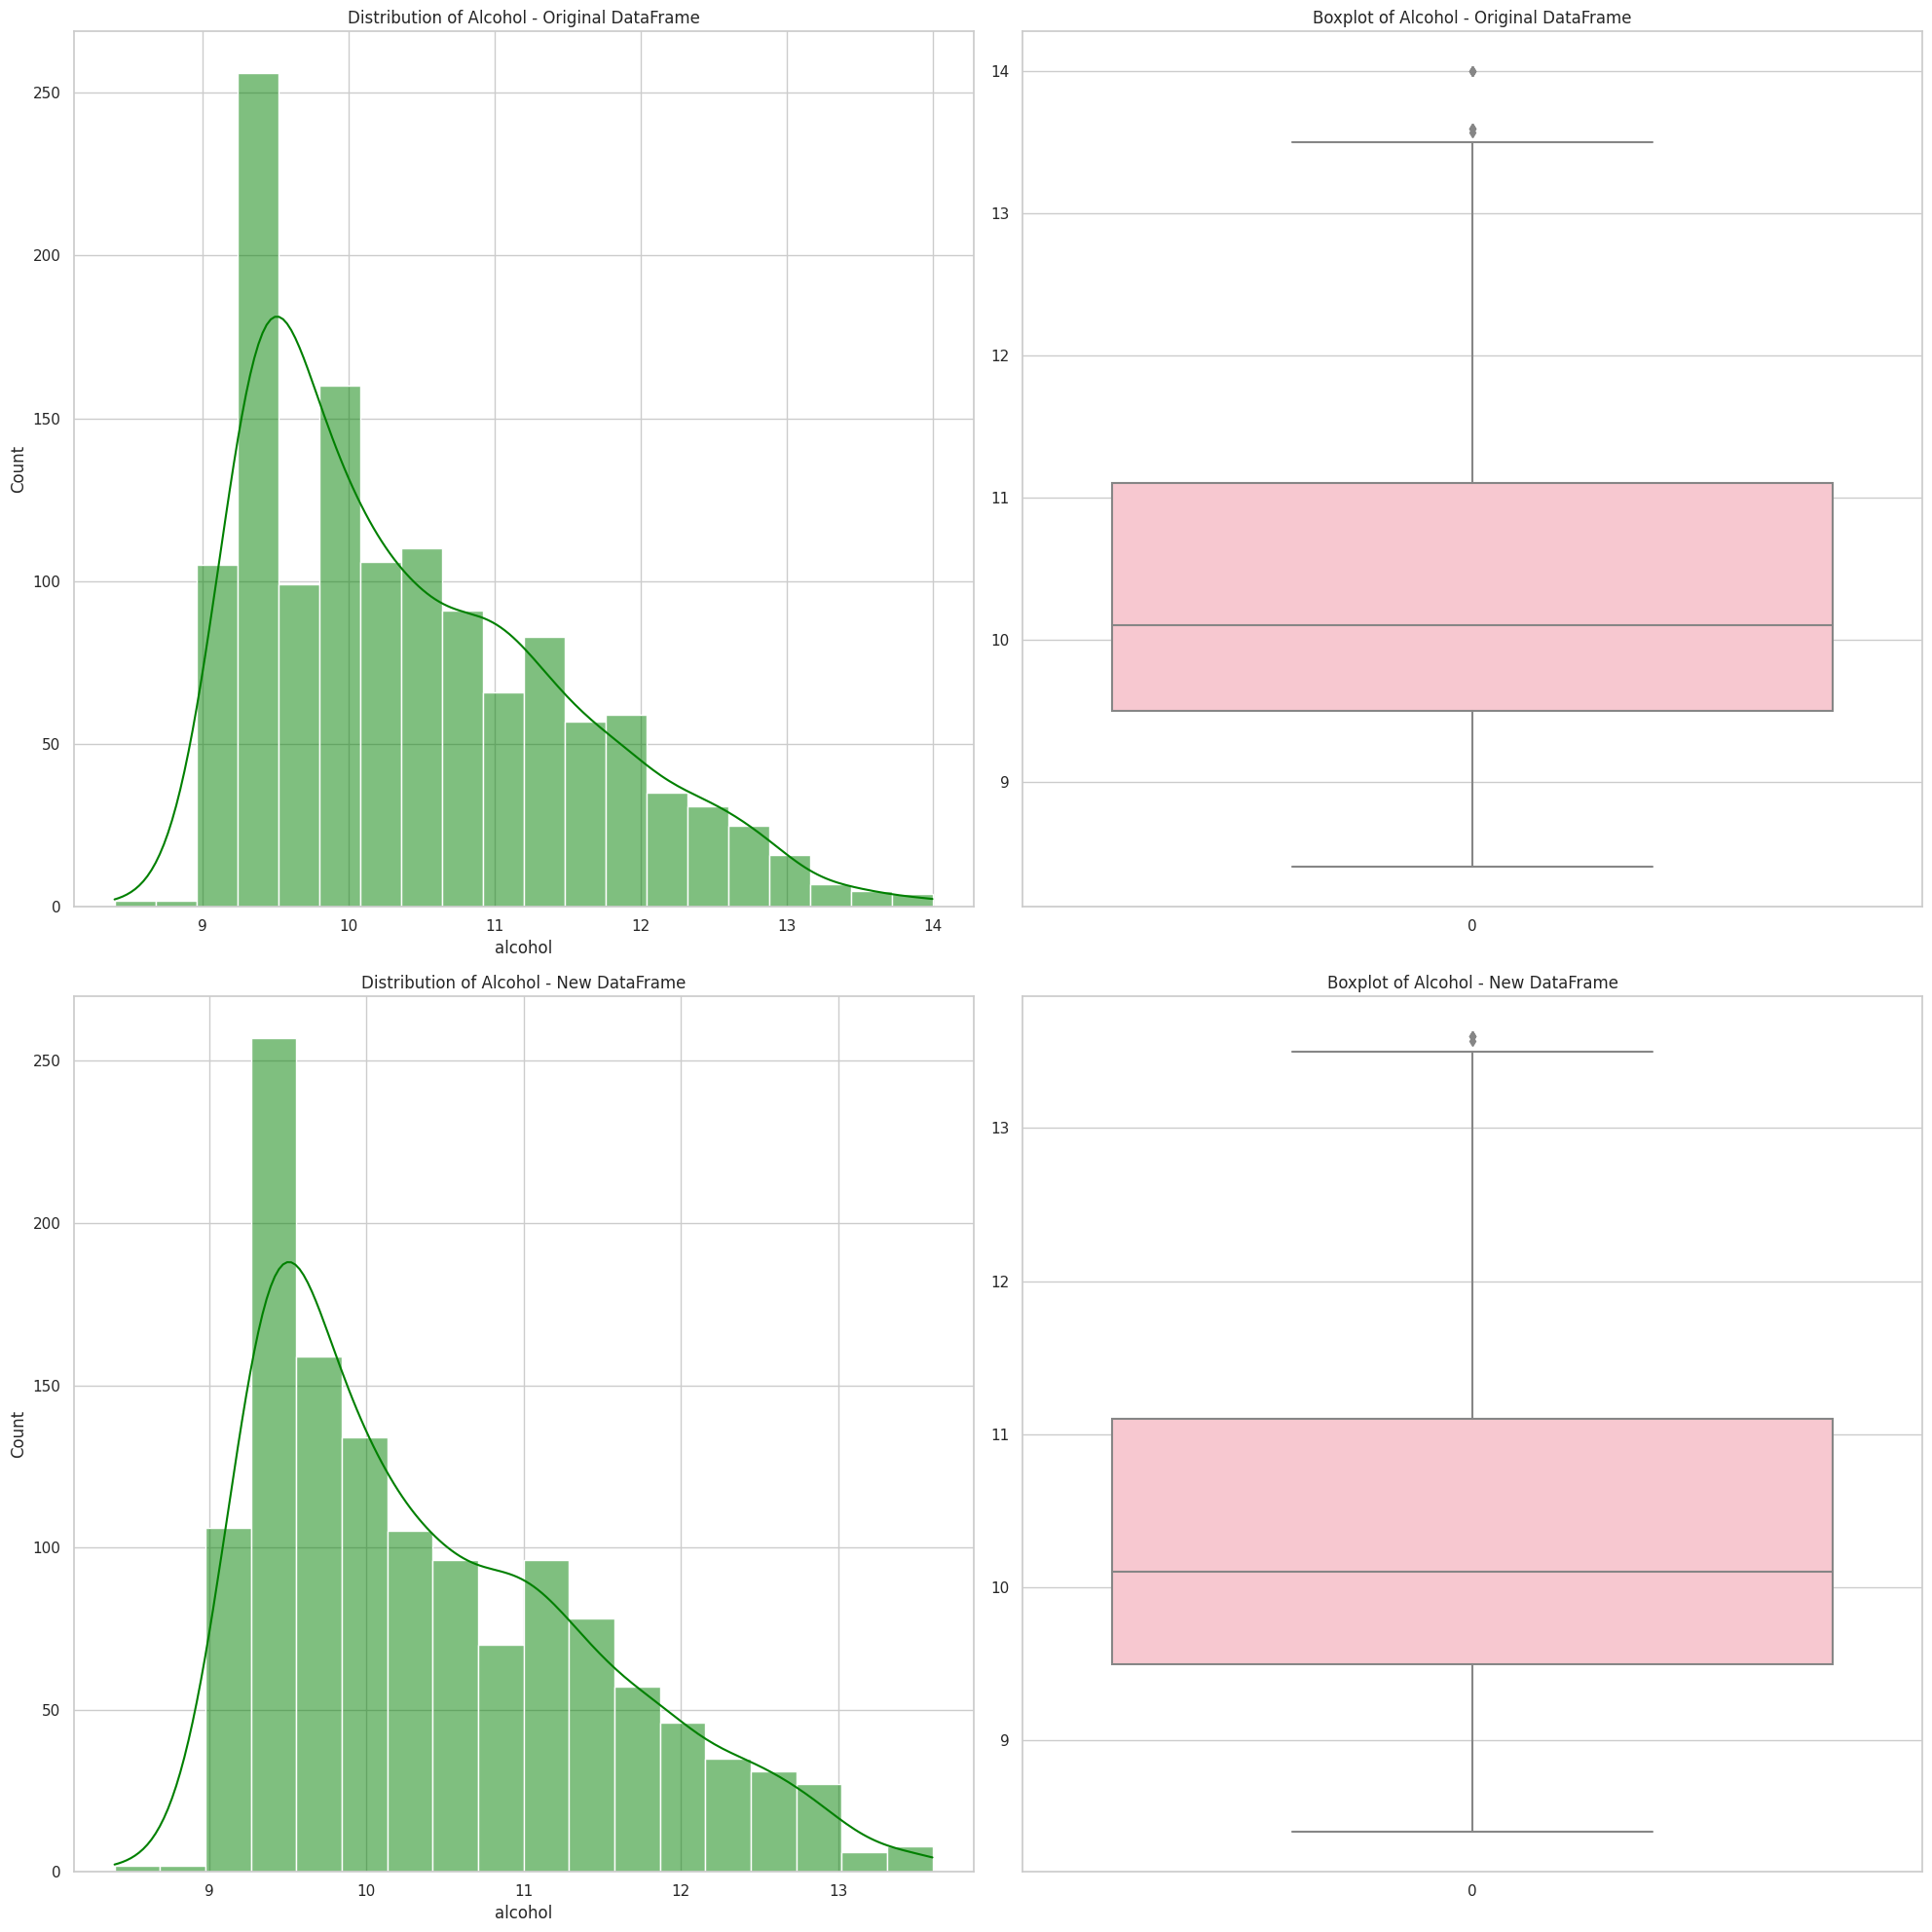

In [119]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['alcohol'], kde=True, color='green')
plt.title('Distribution of Alcohol - Original DataFrame')

plt.subplot(2, 2, 2)
sns.boxplot(df['alcohol'], color='pink')
plt.title('Boxplot of Alcohol - Original DataFrame')

plt.subplot(2, 2, 3)
sns.histplot(new_df['alcohol'], kde=True, color='green')
plt.title('Distribution of Alcohol - New DataFrame')

plt.subplot(2, 2, 4)
sns.boxplot(new_df['alcohol'], color='pink')
plt.title('Boxplot of Alcohol - New DataFrame')

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


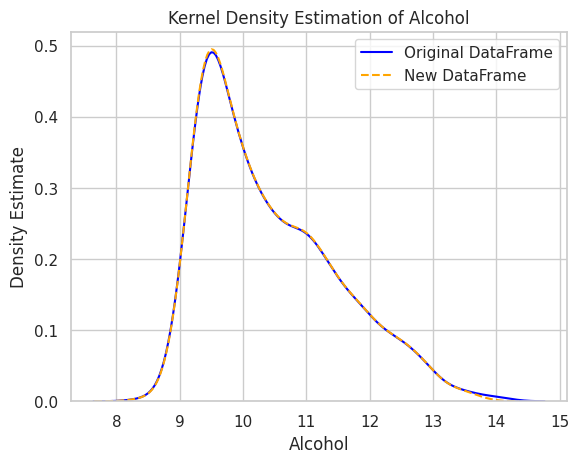

In [120]:
# Plot kernel density estimation plots without histogram
sns.kdeplot(df['alcohol'], color='blue', label='Original DataFrame', linestyle='-')
sns.kdeplot(new_df['alcohol'], color='orange', label='New DataFrame', linestyle='--')

# Add labels and title
plt.xlabel('Alcohol')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of Alcohol')
plt.legend()

plt.show()


In [121]:
df = new_df

In [122]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
887            10.7             0.520         0.38             2.6      0.066   
170             7.9             0.885         0.03             1.8      0.058   
1556            6.6             0.880         0.04             2.2      0.066   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
887                  29.0                  56.0  0.99577  3.15       0.79   
170                   4.0                   8.0  0.99720  3.36       0.33   
1556                 12.0                  20.0  0.99636  3.53       0.56   

      alcohol  quality  
887      12.1        7  
170       9.1        4  
1556      9.9        5

**Split data into train and test data**

In [123]:
x = df.drop('quality', axis=1)
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

**Feature Scalling**

In [124]:
scalor = StandardScaler()
x_train = scalor.fit_transform(x_train)
x_test = scalor.transform(x_test)

**Model Selection and Training**

In [125]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

In [126]:
# Train the model
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [127]:
# Predict on the test set
y_pred = model.predict(x_test)

In [128]:
y_pred

array([7, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6,
       5, 6, 6, 5, 6, 5, 6, 6, 5, 7, 5, 5, 5, 5, 7, 6, 6, 5, 6, 5, 5, 5,
       5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 5, 5,
       5, 5, 7, 6, 6, 5, 7, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 5, 8, 6, 6, 6, 5, 5, 6, 6, 7, 7,
       5, 6, 5, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 7, 6, 6, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5,
       5, 5, 6, 7, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 5, 6,
       6, 5, 5, 6, 5, 7, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5, 5, 6])

**Evaluate the Model**

In [129]:
accuracy_score(y_test, y_pred)

0.623574144486692

In [130]:
confusion_matrix(y_test, y_pred)

array([[ 0,  9,  2,  0,  0],
       [ 0, 81, 21,  0,  0],
       [ 0, 35, 71,  6,  0],
       [ 0,  1, 21, 12,  1],
       [ 0,  0,  2,  1,  0]])

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.64      0.79      0.71       102
           6       0.61      0.63      0.62       112
           7       0.63      0.34      0.44        35
           8       0.00      0.00      0.00         3

    accuracy                           0.62       263
   macro avg       0.38      0.35      0.36       263
weighted avg       0.59      0.62      0.60       263



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
